In [78]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

test for orchids (it is giving the most profit....)

- bollinger bands


In [79]:
file_path = Path("round-4-island-data-bottle")

In [80]:
if file_path.exists():
    df_day_1 = pd.read_csv(file_path / "prices_round_4_day_1.csv", delimiter=";")
    df_day_2 = pd.read_csv(file_path / "prices_round_4_day_2.csv", delimiter=";")
    df_day_3 = pd.read_csv(file_path / "prices_round_4_day_3.csv", delimiter=";")
    print("File loaded successfully.")
else:
    print("File not found. Please ensure the file exists at:", file_path)

df_day_1["timestamp"] = pd.to_numeric(df_day_1["timestamp"])
df_day_2["timestamp"] = pd.to_numeric(df_day_2["timestamp"])
df_day_3["timestamp"] = pd.to_numeric(df_day_3["timestamp"])

File loaded successfully.


In [81]:
df_day_1.head(10)

day  timestamp         product  bid_price_1  bid_volume_1  bid_price_2  \
0    1          0         COCONUT         9999           200          NaN   
1    1          0  COCONUT_COUPON          637            39          NaN   
2    1        100         COCONUT         9999           104       9998.0   
3    1        100  COCONUT_COUPON          637            33          NaN   
4    1        200         COCONUT         9998           133       9997.0   
5    1        200  COCONUT_COUPON          637            42          NaN   
6    1        300  COCONUT_COUPON          638            30          NaN   
7    1        300         COCONUT         9999           149       9998.0   
8    1        400         COCONUT         9998           108       9997.0   
9    1        400  COCONUT_COUPON          637            33          NaN   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           NaN          NaN           NaN        10001           200   
1           NaN          NaN           NaN          638            39   
2          44.0          NaN           NaN        10000           104   
3           NaN          NaN           NaN          638            33   
4          62.0          NaN           NaN         9999           133   
5           NaN          NaN           NaN          638            42   
6           NaN          NaN           NaN          639            30   
7          51.0          NaN           NaN        10000           149   
8          63.0          NaN           NaN         9999           103   
9           NaN          NaN           NaN          638            33   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN          NaN           NaN    10000.0   
1          NaN           NaN          NaN           NaN      637.5   
2      10001.0          44.0          NaN           NaN     9999.5   
3          NaN           NaN          NaN           NaN      637.5   
4      10000.0          62.0          NaN           NaN     9998.5   
5          NaN           NaN          NaN           NaN      637.5   
6          NaN           NaN          NaN           NaN      638.5   
7      10001.0          51.0          NaN           NaN     9999.5   
8      10000.0          63.0          NaN           NaN     9998.5   
9          NaN           NaN          NaN           NaN      637.5   

   profit_and_loss  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6              0.0  
7              0.0  
8              0.0  
9              0.0

In [82]:
coconut_df = df_day_1[df_day_1["product"] == "COCONUT"].copy()
coconut_df.head(10)

day  timestamp  product  bid_price_1  bid_volume_1  bid_price_2  \
0     1          0  COCONUT         9999           200          NaN   
2     1        100  COCONUT         9999           104       9998.0   
4     1        200  COCONUT         9998           133       9997.0   
7     1        300  COCONUT         9999           149       9998.0   
8     1        400  COCONUT         9998           108       9997.0   
10    1        500  COCONUT         9996           114       9995.0   
12    1        600  COCONUT         9996           206          NaN   
15    1        700  COCONUT         9997           125       9996.0   
16    1        800  COCONUT         9996           162          NaN   
18    1        900  COCONUT         9996           116       9995.0   

    bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0            NaN          NaN           NaN        10001           200   
2           44.0          NaN           NaN        10000           104   
4           62.0          NaN           NaN         9999           133   
7           51.0          NaN           NaN        10000           149   
8           63.0          NaN           NaN         9999           103   
10          42.0          NaN           NaN         9997           114   
12           NaN          NaN           NaN         9998           141   
15          65.0          NaN           NaN         9999           190   
16           NaN          NaN           NaN         9998           119   
18          72.0          NaN           NaN         9997           116   

    ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0           NaN           NaN          NaN           NaN    10000.0   
2       10001.0          44.0          NaN           NaN     9999.5   
4       10000.0          62.0          NaN           NaN     9998.5   
7       10001.0          51.0          NaN           NaN     9999.5   
8       10000.0          63.0          NaN           NaN     9998.5   
10       9998.0          42.0          NaN           NaN     9996.5   
12       9999.0          65.0          NaN           NaN     9997.0   
15          NaN           NaN          NaN           NaN     9998.0   
16       9999.0          43.0          NaN           NaN     9997.0   
18       9998.0          72.0          NaN           NaN     9996.5   

    profit_and_loss  
0               0.0  
2               0.0  
4               0.0  
7               0.0  
8               0.0  
10              0.0  
12              0.0  
15              0.0  
16              0.0  
18              0.0

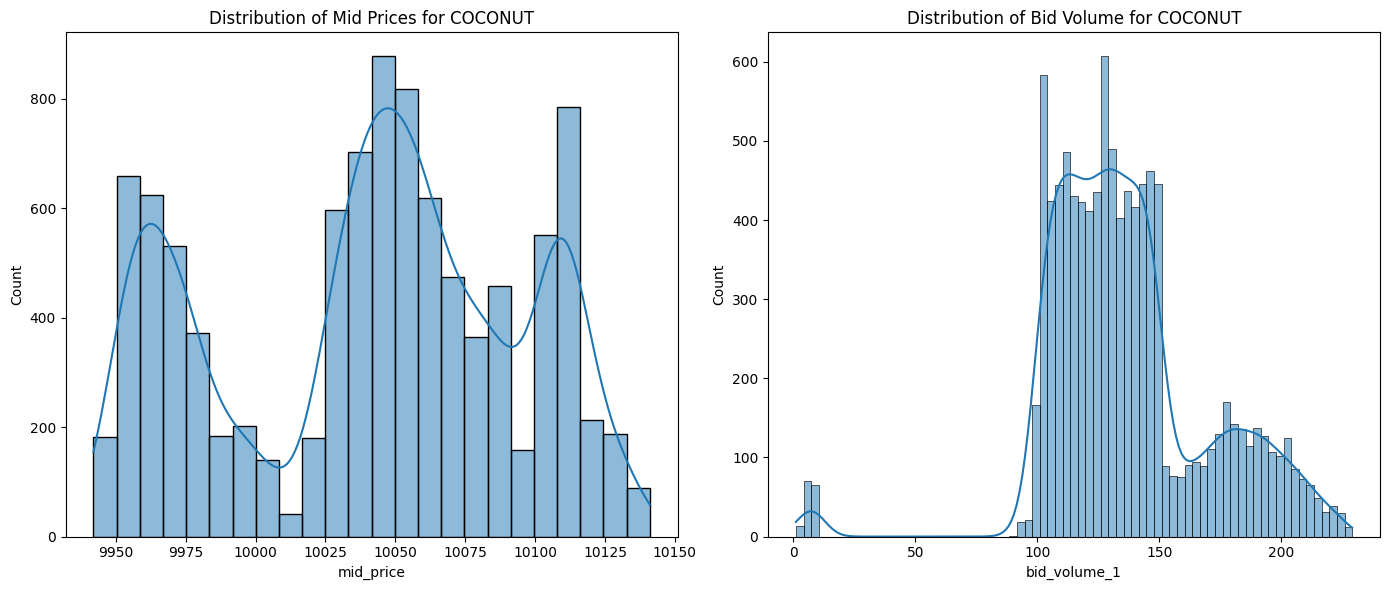

In [83]:
# EDA: Distribution plots for mid_price and bid_volume_1
plt.figure(figsize=(14, 6))

# Plotting the mid_price distribution
plt.subplot(1, 2, 1)
sns.histplot(coconut_df["mid_price"], kde=True)
plt.title("Distribution of Mid Prices for COCONUT")

# Plotting the bid_volume_1 distribution
plt.subplot(1, 2, 2)
sns.histplot(coconut_df["bid_volume_1"], kde=True)
plt.title("Distribution of Bid Volume for COCONUT")

plt.tight_layout()
plt.show()

### 2 MOV. AVG. CROSSOVER


In [84]:
coconut_df

day  timestamp  product  bid_price_1  bid_volume_1  bid_price_2  \
0        1          0  COCONUT         9999           200          NaN   
2        1        100  COCONUT         9999           104       9998.0   
4        1        200  COCONUT         9998           133       9997.0   
7        1        300  COCONUT         9999           149       9998.0   
8        1        400  COCONUT         9998           108       9997.0   
...    ...        ...      ...          ...           ...          ...   
19991    1     999500  COCONUT        10135           103      10134.0   
19993    1     999600  COCONUT        10136           130      10135.0   
19994    1     999700  COCONUT        10134           108      10133.0   
19997    1     999800  COCONUT        10134           122      10133.0   
19999    1     999900  COCONUT        10134           178          NaN   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0               NaN          NaN           NaN        10001           200   
2              44.0          NaN           NaN        10000           104   
4              62.0          NaN           NaN         9999           133   
7              51.0          NaN           NaN        10000           149   
8              63.0          NaN           NaN         9999           103   
...             ...          ...           ...          ...           ...   
19991          51.0          NaN           NaN        10136           111   
19993          67.0          NaN           NaN        10137           130   
19994          54.0          NaN           NaN        10135           108   
19997          65.0          NaN           NaN        10136           181   
19999           NaN          NaN           NaN        10136           120   

       ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0              NaN           NaN          NaN           NaN    10000.0   
2          10001.0          44.0          NaN           NaN     9999.5   
4          10000.0          62.0          NaN           NaN     9998.5   
7          10001.0          51.0          NaN           NaN     9999.5   
8          10000.0          63.0          NaN           NaN     9998.5   
...            ...           ...          ...           ...        ...   
19991      10137.0          51.0          NaN           NaN    10135.5   
19993      10138.0          67.0          NaN           NaN    10136.5   
19994      10136.0          54.0          NaN           NaN    10134.5   
19997          NaN           NaN          NaN           NaN    10135.0   
19999      10137.0          58.0          NaN           NaN    10135.0   

       profit_and_loss  
0                  0.0  
2                  0.0  
4                  0.0  
7                  0.0  
8                  0.0  
...                ...  
19991              0.0  
19993              0.0  
19994              0.0  
19997              0.0  
19999              0.0  

[10000 rows x 17 columns]

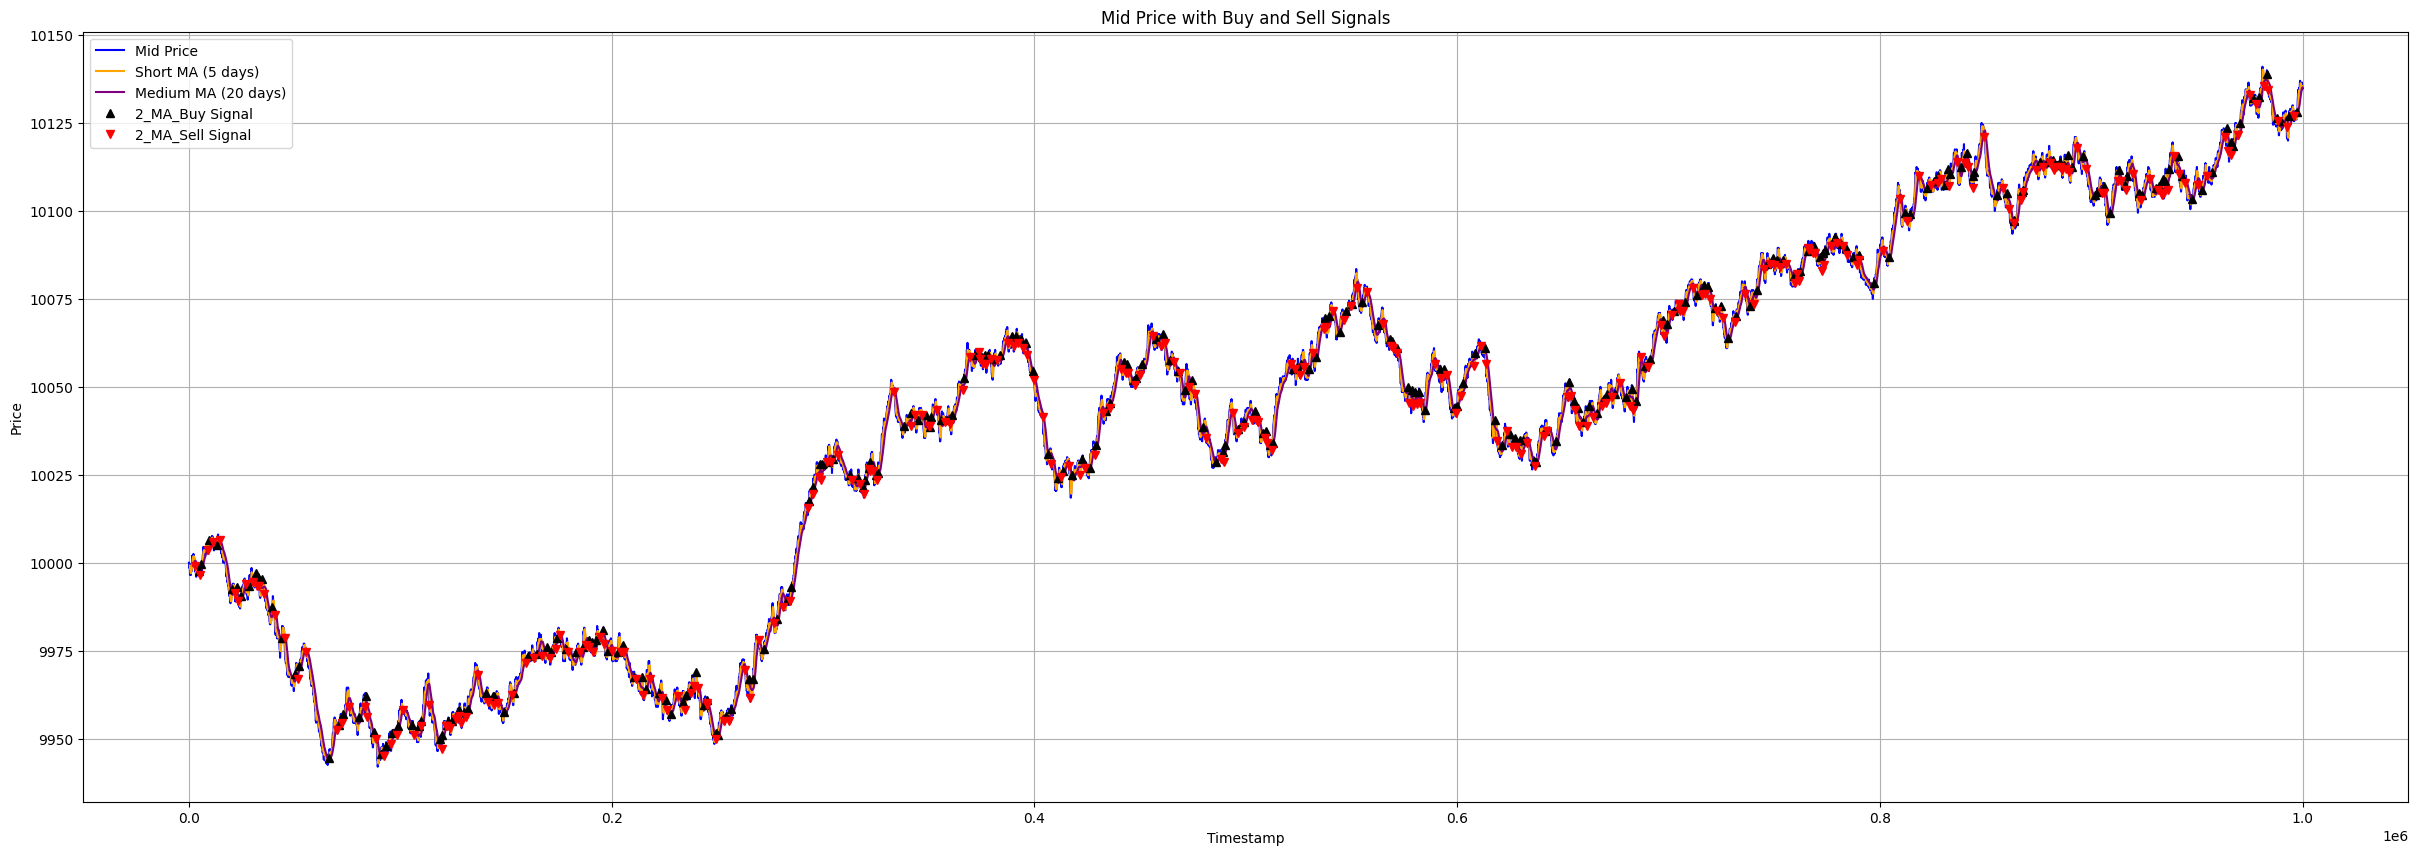

In [125]:
coconut_df["2_MA_short"] = coconut_df["mid_price"].rolling(window=5).mean()
coconut_df["2_MA_medium"] = coconut_df["mid_price"].rolling(window=20).mean()

# Calculate signals
coconut_df["2_MA_Buy"] = (coconut_df["2_MA_short"] > coconut_df["2_MA_medium"]) & (
    coconut_df["2_MA_short"].shift(1) <= coconut_df["2_MA_medium"].shift(1)
)
coconut_df["2_MA_Sell"] = (coconut_df["2_MA_short"] < coconut_df["2_MA_medium"]) & (
    coconut_df["2_MA_short"].shift(1) >= coconut_df["2_MA_medium"].shift(1)
)

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(
    coconut_df["timestamp"], coconut_df["mid_price"], label="Mid Price", color="blue"
)
ax.plot(
    coconut_df["timestamp"],
    coconut_df["2_MA_short"],
    label="Short MA (5 days)",
    color="orange",
    markersize=10,
)
ax.plot(
    coconut_df["timestamp"],
    coconut_df["2_MA_medium"],
    label="Medium MA (20 days)",
    color="purple",
)

# Mark buy and sell signals
ax.plot(
    coconut_df[coconut_df["2_MA_Buy"]]["timestamp"],
    coconut_df[coconut_df["2_MA_Buy"]]["mid_price"],
    "^",
    markersize=6,
    color="black",
    label="2_MA_Buy Signal",
)
ax.plot(
    coconut_df[coconut_df["2_MA_Sell"]]["timestamp"],
    coconut_df[coconut_df["2_MA_Sell"]]["mid_price"],
    "v",
    markersize=6,
    color="r",
    label="2_MA_Sell Signal",
)

ax.set_title("Mid Price with Buy and Sell Signals")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Price")
ax.legend()
plt.grid(True)
plt.show()

### THREE MOV. AVG. CROSSOVER

Short MA: Fastest, reacts quickly to price changes.  
Medium MA: Middle speed, filters out more noise than the short MA.  
Long MA: Slowest, provides the overall trend direction

##### Buy Signal:

- A buy signal could be triggered when both the short MA crosses above the medium MA and the medium MA is above the long MA, indicating a potential upward trend strengthening.

##### Sell Signal:

- Conversely, a sell signal might be when the short MA crosses below the medium MA while the medium MA is below the long MA, suggesting a strengthening downward trend.


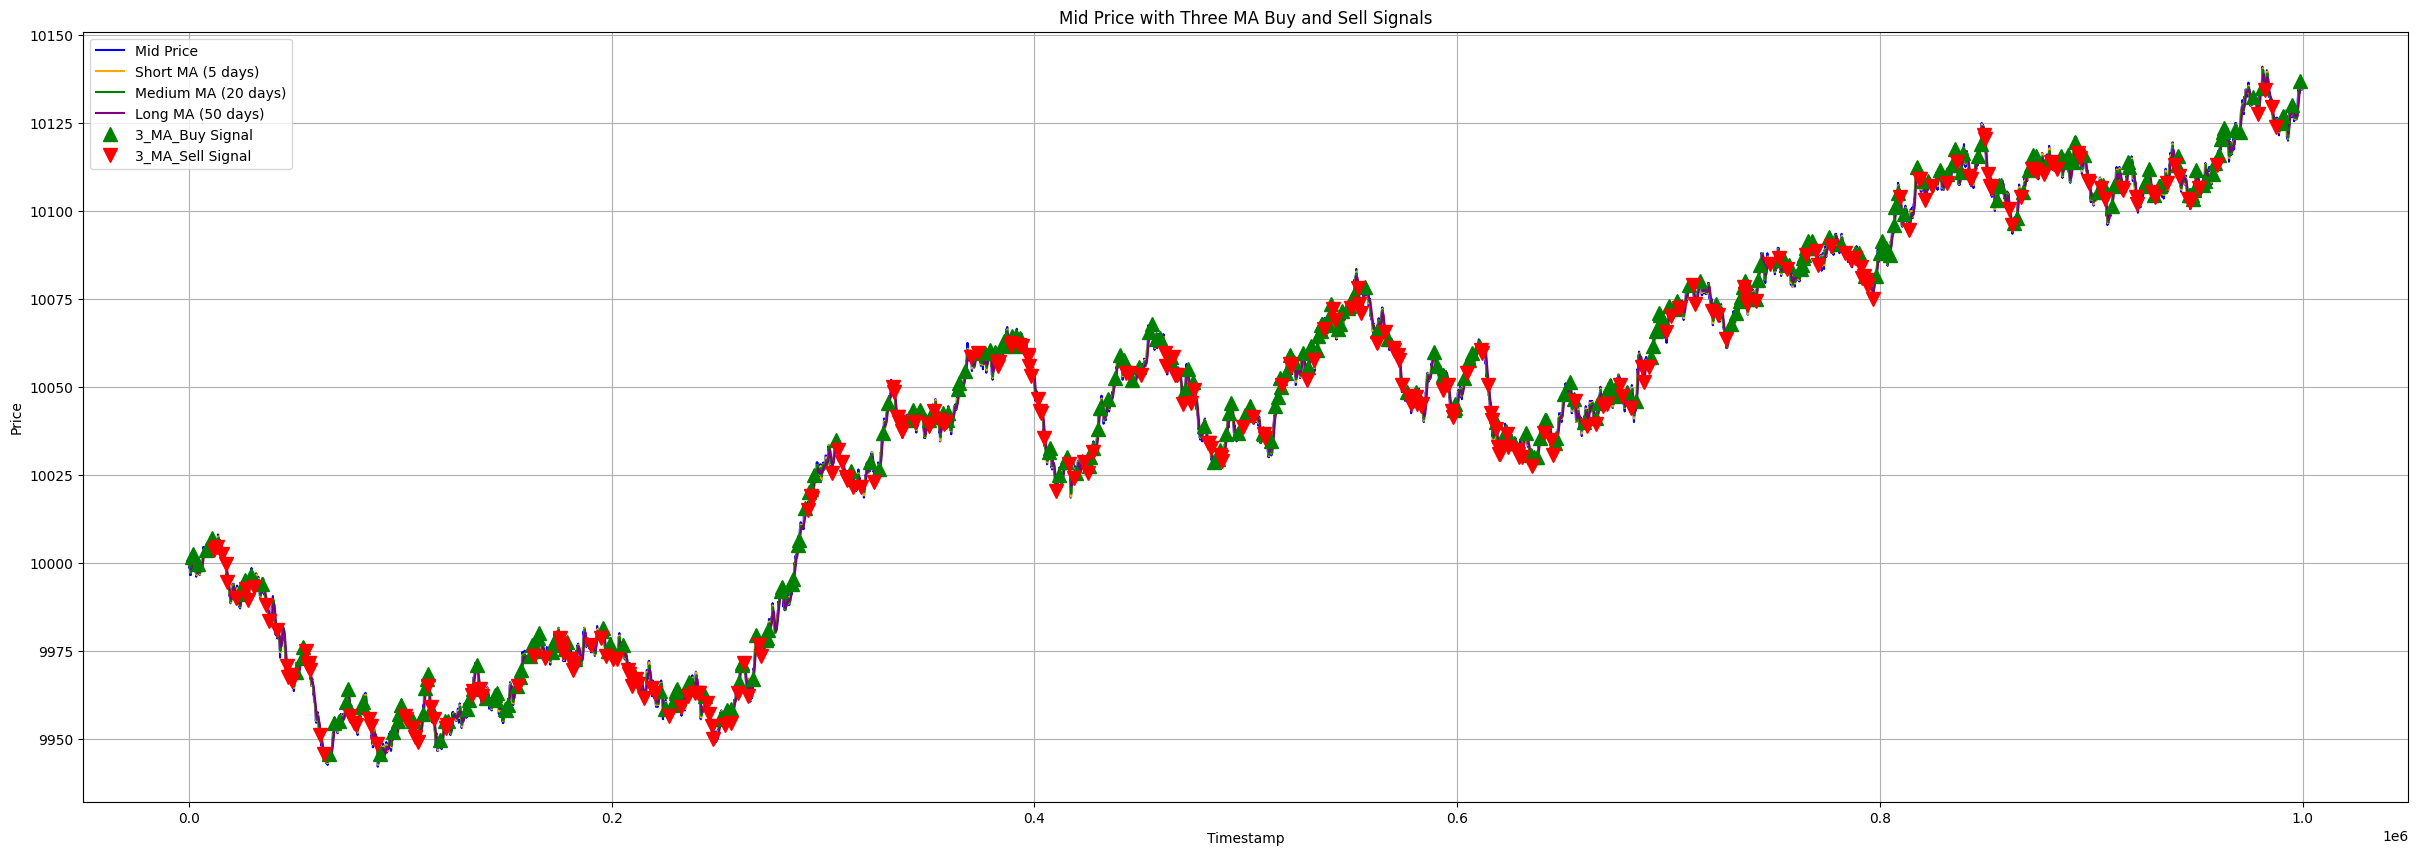

In [114]:
coconut_df["3_MA_short"] = coconut_df["mid_price"].rolling(window=5).mean()
coconut_df["3_MA_medium"] = coconut_df["mid_price"].rolling(window=60).mean()
coconut_df["3_MA_long"] = coconut_df["mid_price"].rolling(window=70).mean()

# Define signals
coconut_df["3_MA_Buy"] = (
    (coconut_df["3_MA_short"] > coconut_df["3_MA_medium"])
    & (coconut_df["3_MA_medium"] > coconut_df["3_MA_long"])
    & (coconut_df["3_MA_short"].shift(1) <= coconut_df["3_MA_medium"].shift(1))
)
coconut_df["3_MA_Sell"] = (
    (coconut_df["3_MA_short"] < coconut_df["3_MA_medium"])
    & (coconut_df["3_MA_medium"] < coconut_df["3_MA_long"])
    & (coconut_df["3_MA_short"].shift(1) >= coconut_df["3_MA_medium"].shift(1))
)

# Plotting
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(
    coconut_df["timestamp"], coconut_df["mid_price"], label="Mid Price", color="blue"
)
ax.plot(
    coconut_df["timestamp"],
    coconut_df["3_MA_short"],
    label="Short MA (5 days)",
    color="orange",
)
ax.plot(
    coconut_df["timestamp"],
    coconut_df["3_MA_medium"],
    label="Medium MA (20 days)",
    color="green",
)
ax.plot(
    coconut_df["timestamp"],
    coconut_df["3_MA_long"],
    label="Long MA (50 days)",
    color="purple",
)

# Mark buy and sell signals
ax.plot(
    coconut_df[coconut_df["3_MA_Buy"]]["timestamp"],
    coconut_df[coconut_df["3_MA_Buy"]]["mid_price"],
    "^",
    markersize=10,
    color="g",
    label="3_MA_Buy Signal",
)
ax.plot(
    coconut_df[coconut_df["3_MA_Sell"]]["timestamp"],
    coconut_df[coconut_df["3_MA_Sell"]]["mid_price"],
    "v",
    markersize=10,
    color="r",
    label="3_MA_Sell Signal",
)

ax.set_title("Mid Price with Three MA Buy and Sell Signals")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Price")
ax.legend()
plt.grid(True)
plt.show()

In [115]:
coconut_df

day  timestamp  product  bid_price_1  bid_volume_1  bid_price_2  \
0        1          0  COCONUT         9999           200          NaN   
2        1        100  COCONUT         9999           104       9998.0   
4        1        200  COCONUT         9998           133       9997.0   
7        1        300  COCONUT         9999           149       9998.0   
8        1        400  COCONUT         9998           108       9997.0   
...    ...        ...      ...          ...           ...          ...   
19991    1     999500  COCONUT        10135           103      10134.0   
19993    1     999600  COCONUT        10136           130      10135.0   
19994    1     999700  COCONUT        10134           108      10133.0   
19997    1     999800  COCONUT        10134           122      10133.0   
19999    1     999900  COCONUT        10134           178          NaN   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ...  2_MA_Sell  \
0               NaN          NaN           NaN        10001  ...      False   
2              44.0          NaN           NaN        10000  ...      False   
4              62.0          NaN           NaN         9999  ...      False   
7              51.0          NaN           NaN        10000  ...      False   
8              63.0          NaN           NaN         9999  ...      False   
...             ...          ...           ...          ...  ...        ...   
19991          51.0          NaN           NaN        10136  ...      False   
19993          67.0          NaN           NaN        10137  ...      False   
19994          54.0          NaN           NaN        10135  ...      False   
19997          65.0          NaN           NaN        10136  ...      False   
19999           NaN          NaN           NaN        10136  ...      False   

         3_MA_short  3_MA_medium  3_MA_long  3_MA_Buy  3_MA_Sell     OBV  \
0               NaN          NaN        NaN     False      False     0.0   
2               NaN          NaN        NaN     False      False  -104.0   
4       9999.333333          NaN        NaN     False      False  -237.0   
7       9999.166667          NaN        NaN     False      False   -88.0   
8       9998.833333       9999.2        NaN     False      False  -196.0   
...             ...          ...        ...       ...        ...     ...   
19991  10135.500000      10135.1   10135.70     False      False -5288.0   
19993  10136.000000      10135.5   10135.75     False      False -5158.0   
19994  10135.500000      10135.5   10135.50     False      False -5266.0   
19997  10135.333333      10135.5   10135.35     False      False -5144.0   
19999  10134.833333      10135.3   10135.25     False      False -5144.0   

        OBV_MA  OBV_Buy  OBV_Sell  
0          NaN    False     False  
2          NaN    False     False  
4          NaN    False     False  
7          NaN    False     False  
8          NaN    False     False  
...        ...      ...       ...  
19991 -5342.20    False     False  
19993 -5313.65    False     False  
19994 -5295.90    False     False  
19997 -5278.70    False     False  
19999 -5266.85    False     False  

[10000 rows x 30 columns]

In [116]:
coconut_df[coconut_df["3_MA_Buy"]].index

Index([   31,    42,    90,   163,   206,   214,   489,   501,   511,   531,
       ...
       19252, 19356, 19403, 19527, 19610, 19795, 19803, 19813, 19903, 19975],
      dtype='int64', length=361)

In [117]:
buys = coconut_df[coconut_df["3_MA_Buy"]].index
sells = coconut_df[coconut_df["3_MA_Sell"]].index

# Ensuring proper order: start with a buy and end with a sell
if sells[0] < buys[0]:
    sells = sells[1:]
if buys[-1] > sells[-1]:
    buys = buys[:-1]

# Ensure that buys and sells are paired correctly
paired_buys = []
paired_sells = []

for sell in sells:
    valid_buys = buys[buys < sell]  # Buys before the current sell
    if not valid_buys.empty:
        paired_buy = valid_buys.max()  # The last buy before the current sell
        if paired_buy not in paired_buys:  # Ensuring each buy is only used once
            paired_buys.append(paired_buy)
            paired_sells.append(sell)

# Check if there are paired indices to avoid KeyError
if paired_buys and paired_sells:
    # Extract prices for these paired buys and sells
    buy_prices = coconut_df.loc[paired_buys, "mid_price"]
    sell_prices = coconut_df.loc[paired_sells, "mid_price"]

    # Calculate PnL for each trade
    pnl = sell_prices.values - buy_prices.values

    # Calculate cumulative PnL
    cumulative_pnl = np.cumsum(pnl)

    # Results
    results = pd.DataFrame(
        {
            "Buy Index": paired_buys,
            "Sell Index": paired_sells,
            "Buy": buy_prices.values,
            "Sell": sell_prices.values,
            "PnL": pnl,
            "Cumulative PnL": cumulative_pnl,
        }
    )

    print(results)
else:
    print("No valid buy/sell pairs were found. Check your data and signal logic.")

     Buy Index  Sell Index      Buy     Sell  PnL  Cumulative PnL
0          214         236  10007.0  10003.5 -3.5            -3.5
1          531         542   9995.0   9992.5 -2.5            -6.0
2          587         621   9996.5   9993.0 -3.5            -9.5
3          688         732   9994.0   9988.0 -6.0           -15.5
4         1082        1104   9976.0   9975.0 -1.0           -16.5
..         ...         ...      ...      ...  ...             ...
140      18930       18933  10104.5  10102.5 -2.0          -339.0
141      18995       19019  10111.5  10106.5 -5.0          -344.0
142      19171       19191  10113.5  10113.0 -0.5          -344.5
143      19527       19578  10132.5  10127.5 -5.0          -349.5
144      19610       19647  10135.0  10134.5 -0.5          -350.0

[145 rows x 6 columns]


#### Optimise


In [119]:
def calculate_pnl(df):
    # Identify buy and sell points
    buys = df[df["3_MA_OPT_BUY"]].index
    sells = df[df["3_MA_OPT_SELL"]].index

    # Ensure that we start with a buy and end with a sell
    if sells[0] < buys[0]:
        sells = sells[1:]
    if buys[-1] > sells[-1]:
        buys = buys[:-1]

    # Ensure each buy is paired with a sell
    paired_buys = []
    paired_sells = []
    sell_iter = iter(sells)
    for buy in buys:
        try:
            sell = next(sell_iter)
            while sell < buy:
                sell = next(sell_iter)
            paired_buys.append(buy)
            paired_sells.append(sell)
        except StopIteration:
            break  # No more sells available

    buy_prices = df.loc[paired_buys, "mid_price"]
    sell_prices = df.loc[paired_sells, "mid_price"]

    # Calculate PnL for each trade
    pnl = (sell_prices.values - buy_prices.values).sum()
    return pnl


# Ranges for window sizes
short_windows = range(5, 31, 5)
medium_windows = range(20, 61, 10)
long_windows = range(50, 121, 20)

# Storage for optimization results
results = []

# Optimization loop
for short in short_windows:
    for medium in medium_windows:
        for long in long_windows:
            if short < medium < long:  # Logical order of MAs
                coconut_df["3_MA_OPT_short"] = (
                    coconut_df["mid_price"].rolling(window=short).mean()
                )
                coconut_df["3_MA_OPT_medium"] = (
                    coconut_df["mid_price"].rolling(window=medium).mean()
                )
                coconut_df["3_MA_OPT_long"] = (
                    coconut_df["mid_price"].rolling(window=long).mean()
                )

                # Generate trading signals
                coconut_df["3_MA_OPT_BUY"] = (
                    coconut_df["3_MA_OPT_short"] > coconut_df["3_MA_OPT_medium"]
                ) & (
                    coconut_df["3_MA_OPT_short"].shift(1)
                    <= coconut_df["3_MA_OPT_medium"].shift(1)
                )
                coconut_df["3_MA_OPT_SELL"] = (
                    coconut_df["3_MA_OPT_short"] < coconut_df["3_MA_OPT_medium"]
                ) & (
                    coconut_df["3_MA_OPT_short"].shift(1)
                    >= coconut_df["3_MA_OPT_medium"].shift(1)
                )

                # Calculate PnL
                pnl = calculate_pnl(coconut_df)

                # Store the results
                results.append(
                    {
                        "Short MA": short,
                        "Medium MA": medium,
                        "Long MA": long,
                        "PnL": pnl,
                    }
                )

# Convert results to a DataFrame and find the best settings
results_df = pd.DataFrame(results)
best_config = results_df.loc[results_df["PnL"].idxmax()]
print("Best Configuration:")
print(best_config)

Best Configuration:
Short MA       5.0
Medium MA     60.0
Long MA       70.0
PnL          596.5
Name: 15, dtype: float64


### On Balance Volume (OBV)


In [90]:
# Calculate OBV
coconut_df["OBV"] = (
    (np.sign(coconut_df["mid_price"].diff()) * coconut_df["bid_volume_1"])
    .fillna(0)
    .cumsum()
)

In [91]:
# Simple Moving Average of OBV for signals
coconut_df["OBV_MA"] = coconut_df["OBV"].rolling(window=20).mean()

# Generate signals
coconut_df["OBV_Buy"] = (coconut_df["OBV"] > coconut_df["OBV_MA"]) & (
    coconut_df["OBV"].shift(1) <= coconut_df["OBV_MA"].shift(1)
)
coconut_df["OBV_Sell"] = (coconut_df["OBV"] < coconut_df["OBV_MA"]) & (
    coconut_df["OBV"].shift(1) >= coconut_df["OBV_MA"].shift(1)
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


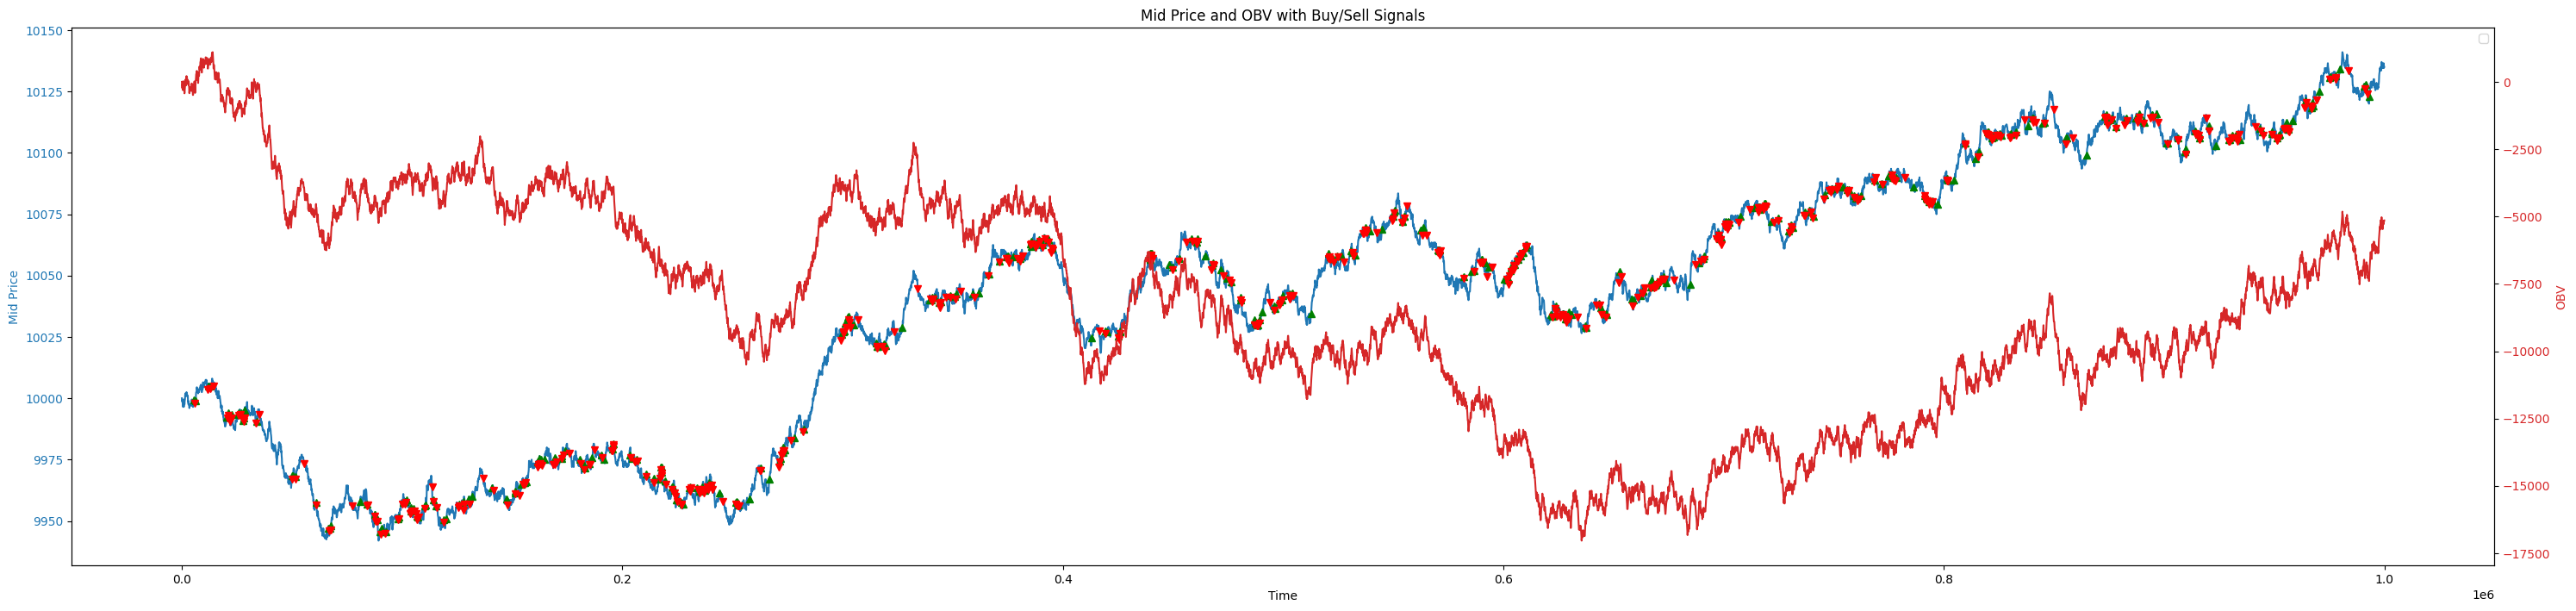

In [155]:
fig, ax1 = plt.subplots(figsize=(30, 7))

color = "tab:blue"
ax1.set_xlabel("Time")
ax1.set_ylabel("Mid Price", color=color)
ax1.plot(coconut_df["timestamp"], coconut_df["mid_price"], color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = "tab:red"
ax2.set_ylabel("OBV", color=color)  # we already handled the x-label with ax1
ax2.plot(coconut_df["timestamp"], coconut_df["OBV"], color=color)
ax2.tick_params(axis="y", labelcolor=color)

# Mark buy and sell signals
ax1.plot(
    coconut_df[coconut_df["OBV_Buy"]]["timestamp"],
    coconut_df[coconut_df["OBV_Buy"]]["mid_price"],
    "^",
    markersize=6,
    color="g",
    label="Buy Signal",
)
ax1.plot(
    coconut_df[coconut_df["OBV_Sell"]]["timestamp"],
    coconut_df[coconut_df["OBV_Sell"]]["mid_price"],
    "v",
    markersize=6,
    color="r",
    label="Sell Signal",
)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Mid Price and OBV with Buy/Sell Signals")
plt.legend()
plt.show()

In [33]:
# Display the first 50 rows of the processed dataframe with the signals
print(
    coconut_df[
        [
            "timestamp",
            "mid_price",
            "MA_short",
            "MA_medium",
            "MA_long",
            "MA_Crossover_Signal",
            "OBV",
            "OBV_Signal",
        ]
    ].head(50)
)

    timestamp  mid_price  MA_short  MA_medium  MA_long  MA_Crossover_Signal  \
0           0    10000.0       NaN        NaN      NaN                    0   
2         100     9999.5       NaN        NaN      NaN                    0   
4         200     9998.5       NaN        NaN      NaN                    0   
7         300     9999.5       NaN        NaN      NaN                    0   
8         400     9998.5    9999.2        NaN      NaN                    0   
10        500     9996.5    9998.5        NaN      NaN                    0   
12        600     9997.0    9998.0        NaN      NaN                    0   
15        700     9998.0    9997.9        NaN      NaN                    0   
16        800     9997.0    9997.4        NaN      NaN                    0   
18        900     9996.5    9997.0        NaN      NaN                    0   
20       1000     9999.5    9997.6        NaN      NaN                    0   
23       1100     9998.0    9997.8        NaN      N

#### OBV Optimisation


In [121]:
coconut_df["OBV"] = 0
coconut_df.loc[1:, "OBV"] = (
    np.sign(coconut_df["mid_price"].diff()) * coconut_df["bid_volume_1"]
).cumsum()
coconut_df["OBV"].fillna(0, inplace=True)  # fill initial NaN

/var/folders/k7/83tjk1tn08x8p9kpdnsx45zh0000gp/T/ipykernel_37118/82238566.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coconut_df["OBV"].fillna(0, inplace=True)  # fill initial NaN


In [124]:
def calculate_pnl(df):
    buys = df[df["OBV_Buy"]].index
    sells = df[df["OBV_Sell"]].index

    # Removing unmatched signals
    if sells.empty or buys.empty:
        return 0  # No trades to make if either is empty

    # Making sure we start with a buy and end with a sell
    if sells[0] < buys[0]:
        sells = sells[1:]
    if buys[-1] > sells[-1]:
        buys = buys[:-1]

    # Matching buys with the next immediate sell
    paired_buys = []
    paired_sells = []
    sell_index = 0

    for buy in buys:
        while sell_index < len(sells) and sells[sell_index] <= buy:
            sell_index += 1
        if sell_index < len(sells):
            paired_buys.append(buy)
            paired_sells.append(sells[sell_index])
            sell_index += 1  # Move to the next sell for the next buy

    buy_prices = df.loc[paired_buys, "mid_price"]
    sell_prices = df.loc[paired_sells, "mid_price"]

    # Calculate PnL for each trade
    pnl = (sell_prices.values - buy_prices.values).sum()
    return pnl


# Define range for OBV MA windows
obv_ma_windows = range(5, 51, 5)

# Storage for optimization results
results = []

# Optimization loop
for window in obv_ma_windows:
    coconut_df["OBV_MA"] = coconut_df["OBV"].rolling(window=window).mean()

    # Generate trading signals
    coconut_df["OBV_Buy"] = (coconut_df["OBV"] > coconut_df["OBV_MA"]) & (
        coconut_df["OBV"].shift(1) <= coconut_df["OBV_MA"].shift(1)
    )
    coconut_df["OBV_Sell"] = (coconut_df["OBV"] < coconut_df["OBV_MA"]) & (
        coconut_df["OBV"].shift(1) >= coconut_df["OBV_MA"].shift(1)
    )

    # Calculate PnL
    pnl = calculate_pnl(coconut_df)

    # Store the results
    results.append({"OBV_MA_Window": window, "PnL": pnl})

# Convert results to a DataFrame and find the best settings
results_df = pd.DataFrame(results)
best_config = results_df.loc[results_df["PnL"].idxmax()]

print("Best Configuration:")
print(best_config)

Best Configuration:
OBV_MA_Window     50.0
PnL              188.5
Name: 9, dtype: float64


# Moving Average Convergence Divergence (MACD)

identify trends and momentum in financial markets


In [133]:
coconut_df["EMA_12"] = coconut_df["mid_price"].ewm(span=12, adjust=False).mean()
coconut_df["EMA_26"] = coconut_df["mid_price"].ewm(span=26, adjust=False).mean()

coconut_df["MACD_line"] = coconut_df["EMA_12"] - coconut_df["EMA_26"]

coconut_df["Signal_line"] = coconut_df["MACD_line"].ewm(span=9, adjust=False).mean()

coconut_df["MACD_histogram"] = coconut_df["MACD_line"] - coconut_df["Signal_line"]

In [134]:
coconut_df["MACD_Buy_Signal"] = (
    coconut_df["MACD_line"] > coconut_df["Signal_line"]
) & (coconut_df["MACD_line"].shift(1) <= coconut_df["Signal_line"].shift(1))
coconut_df["MACD_Sell_Signal"] = (
    coconut_df["MACD_line"] < coconut_df["Signal_line"]
) & (coconut_df["MACD_line"].shift(1) >= coconut_df["Signal_line"].shift(1))

In [127]:
# 9-period EMA of the MACD line
coconut_df["Signal_line"] = coconut_df["MACD_line"].ewm(span=9, adjust=False).mean()

In [128]:
coconut_df["MACD_histogram"] = coconut_df["MACD_line"] - coconut_df["Signal_line"]

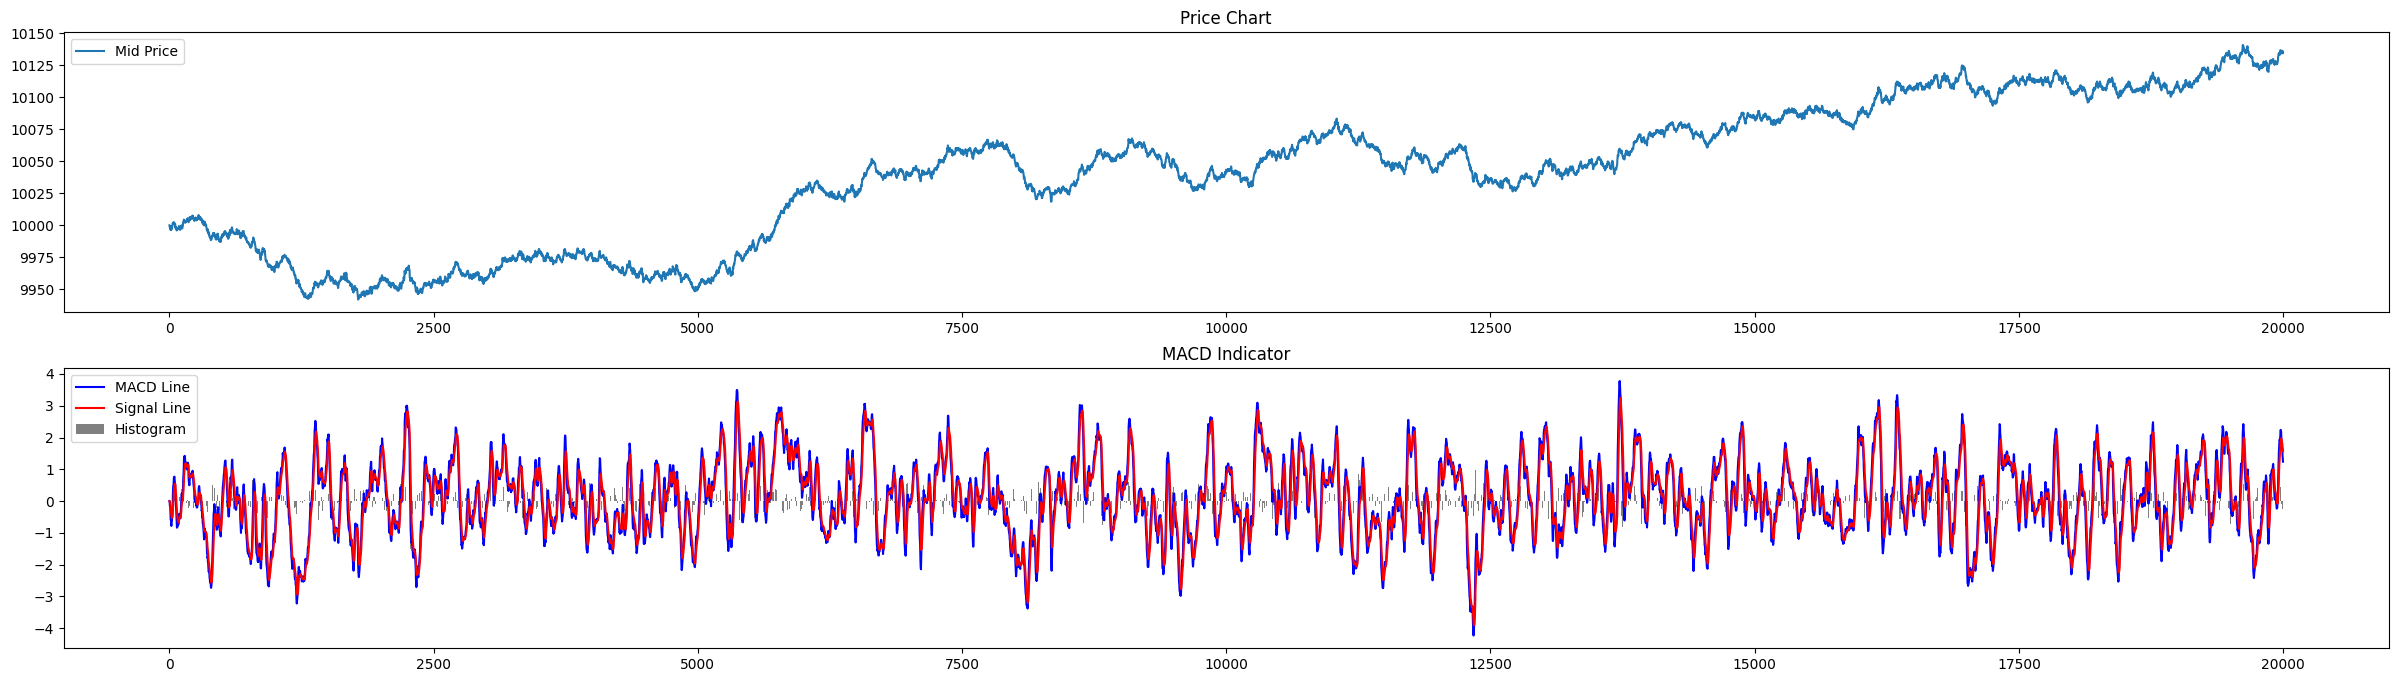

In [132]:
plt.figure(figsize=(30, 8))
plt.subplot(211)
plt.plot(coconut_df["mid_price"], label="Mid Price")
plt.title("Price Chart")
plt.legend()

plt.subplot(212)
plt.plot(coconut_df["MACD_line"], label="MACD Line", color="blue")
plt.plot(coconut_df["Signal_line"], label="Signal Line", color="red")
plt.bar(coconut_df.index, coconut_df["MACD_histogram"], label="Histogram", color="grey")
plt.title("MACD Indicator")
plt.legend()

plt.show()

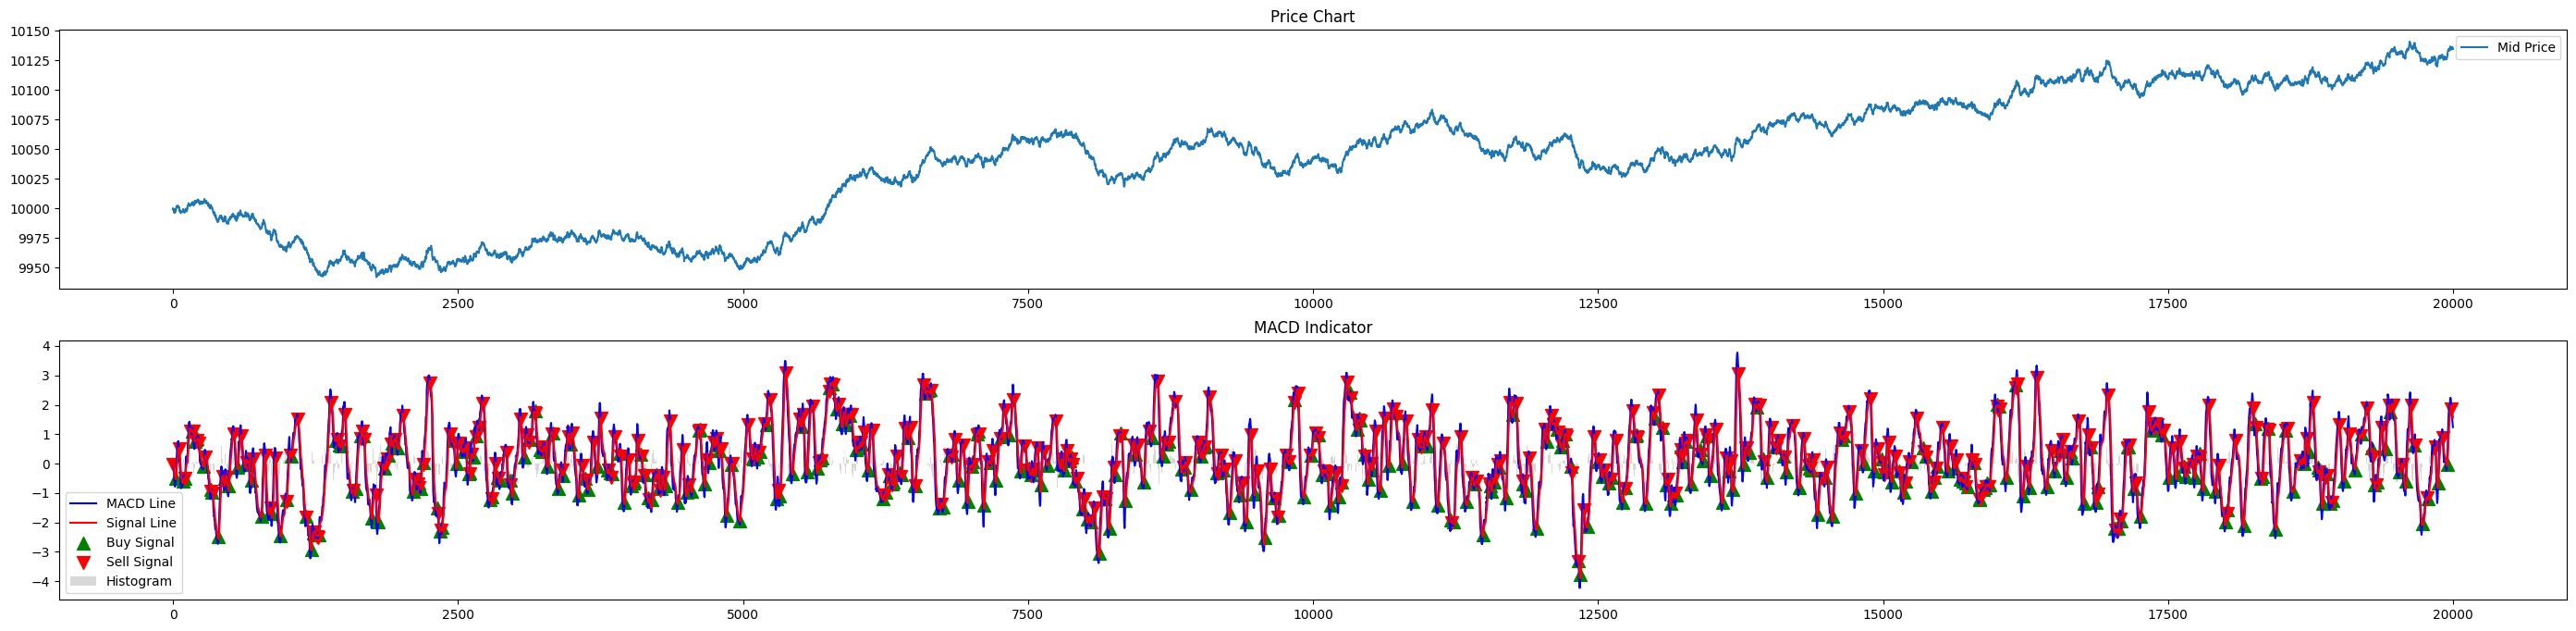

In [137]:
plt.figure(figsize=(35, 8))
# Plotting the mid price
plt.subplot(211)
plt.plot(coconut_df["mid_price"], label="Mid Price")
plt.title("Price Chart")
plt.legend()

# Plotting the MACD and Signal line
plt.subplot(212)
plt.plot(coconut_df["MACD_line"], label="MACD Line", color="blue")
plt.plot(coconut_df["Signal_line"], label="Signal Line", color="red")
plt.bar(
    coconut_df.index,
    coconut_df["MACD_histogram"],
    label="Histogram",
    color="grey",
    alpha=0.3,
)
plt.scatter(
    coconut_df.index[coconut_df["MACD_Buy_Signal"]],
    coconut_df["MACD_line"][coconut_df["MACD_Buy_Signal"]],
    color="green",
    label="Buy Signal",
    marker="^",
    s=100,
)
plt.scatter(
    coconut_df.index[coconut_df["MACD_Sell_Signal"]],
    coconut_df["MACD_line"][coconut_df["MACD_Sell_Signal"]],
    color="red",
    label="Sell Signal",
    marker="v",
    s=100,
)
plt.title("MACD Indicator")
plt.legend()

plt.show()

#### MACD Optimisation


In [138]:
def calculate_pnl(df):
    """Calculate PnL from buy and sell signals."""
    buy_prices = df[df["MACD_Buy_Signal"]]["mid_price"]
    sell_prices = df[df["MACD_Sell_Signal"]]["mid_price"]

    # Ensure trades are alternated starting with a buy and ending with a sell
    if not buy_prices.empty and not sell_prices.empty:
        if buy_prices.index[0] > sell_prices.index[0]:
            sell_prices = sell_prices.iloc[1:]
        if buy_prices.index[-1] > sell_prices.index[-1]:
            buy_prices = buy_prices.iloc[:-1]

        # Calculate the profits
        profits = sell_prices.values - buy_prices.values
        return profits.sum()
    return 0


# Define ranges for the EMA periods
ema_short_options = range(10, 20)  # Example: 10, 11, ..., 19
ema_long_options = range(21, 40)  # Example: 21, 22, ..., 39
signal_line_options = range(5, 15)  # Example: 5, 6, ..., 14

results = []

# Optimization loop
for short in ema_short_options:
    for long in ema_long_options:
        for signal in signal_line_options:
            if short < long:  # Ensure the short EMA is less than the long EMA
                coconut_df["EMA_short"] = (
                    coconut_df["mid_price"].ewm(span=short, adjust=False).mean()
                )
                coconut_df["EMA_long"] = (
                    coconut_df["mid_price"].ewm(span=long, adjust=False).mean()
                )
                coconut_df["MACD_line"] = (
                    coconut_df["EMA_short"] - coconut_df["EMA_long"]
                )
                coconut_df["Signal_line"] = (
                    coconut_df["MACD_line"].ewm(span=signal, adjust=False).mean()
                )

                coconut_df["MACD_Buy_Signal"] = (
                    coconut_df["MACD_line"] > coconut_df["Signal_line"]
                ) & (
                    coconut_df["MACD_line"].shift(1)
                    <= coconut_df["Signal_line"].shift(1)
                )
                coconut_df["MACD_Sell_Signal"] = (
                    coconut_df["MACD_line"] < coconut_df["Signal_line"]
                ) & (
                    coconut_df["MACD_line"].shift(1)
                    >= coconut_df["Signal_line"].shift(1)
                )

                pnl = calculate_pnl(coconut_df)

                results.append(
                    {
                        "Short EMA": short,
                        "Long EMA": long,
                        "Signal EMA": signal,
                        "PnL": pnl,
                    }
                )

# Convert results to DataFrame and find the best settings
results_df = pd.DataFrame(results)
best_config = results_df.loc[results_df["PnL"].idxmax()]

print("Best Configuration:")
print(best_config)

Best Configuration:
Short EMA      10.0
Long EMA       36.0
Signal EMA      5.0
PnL           133.0
Name: 150, dtype: float64


In [139]:
best_short = best_config["Short EMA"]
best_long = best_config["Long EMA"]
best_signal = best_config["Signal EMA"]

In [140]:
coconut_df["EMA_short"] = (
    coconut_df["mid_price"].ewm(span=best_short, adjust=False).mean()
)
coconut_df["EMA_long"] = (
    coconut_df["mid_price"].ewm(span=best_long, adjust=False).mean()
)
coconut_df["MACD_line"] = coconut_df["EMA_short"] - coconut_df["EMA_long"]
coconut_df["Signal_line"] = (
    coconut_df["MACD_line"].ewm(span=best_signal, adjust=False).mean()
)

In [141]:
coconut_df["MACD_Buy_Signal"] = (
    coconut_df["MACD_line"] > coconut_df["Signal_line"]
) & (coconut_df["MACD_line"].shift(1) <= coconut_df["Signal_line"].shift(1))

coconut_df["MACD_Sell_Signal"] = (
    coconut_df["MACD_line"] < coconut_df["Signal_line"]
) & (coconut_df["MACD_line"].shift(1) >= coconut_df["Signal_line"].shift(1))

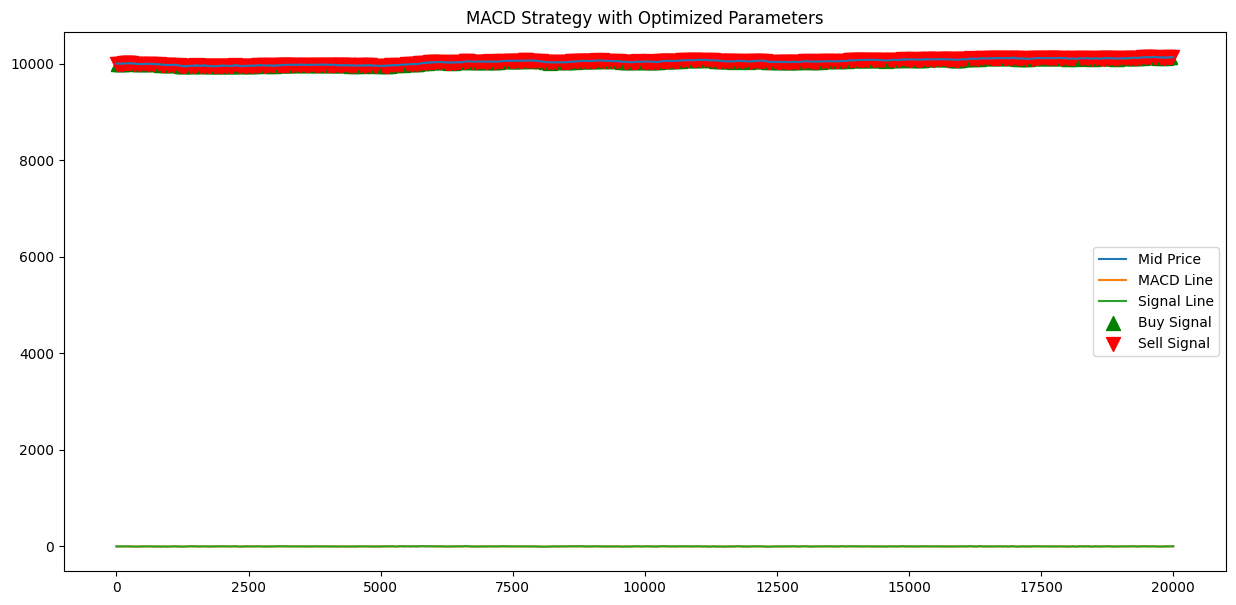

In [142]:
plt.figure(figsize=(15, 7))
plt.plot(coconut_df["mid_price"], label="Mid Price")
plt.plot(coconut_df["MACD_line"], label="MACD Line")
plt.plot(coconut_df["Signal_line"], label="Signal Line")

# Highlight buy and sell signals
plt.scatter(
    coconut_df[coconut_df["MACD_Buy_Signal"]].index,
    coconut_df[coconut_df["MACD_Buy_Signal"]]["mid_price"],
    color="green",
    label="Buy Signal",
    marker="^",
    s=100,
)
plt.scatter(
    coconut_df[coconut_df["MACD_Sell_Signal"]].index,
    coconut_df[coconut_df["MACD_Sell_Signal"]]["mid_price"],
    color="red",
    label="Sell Signal",
    marker="v",
    s=100,
)

plt.title("MACD Strategy with Optimized Parameters")
plt.legend()
plt.show()

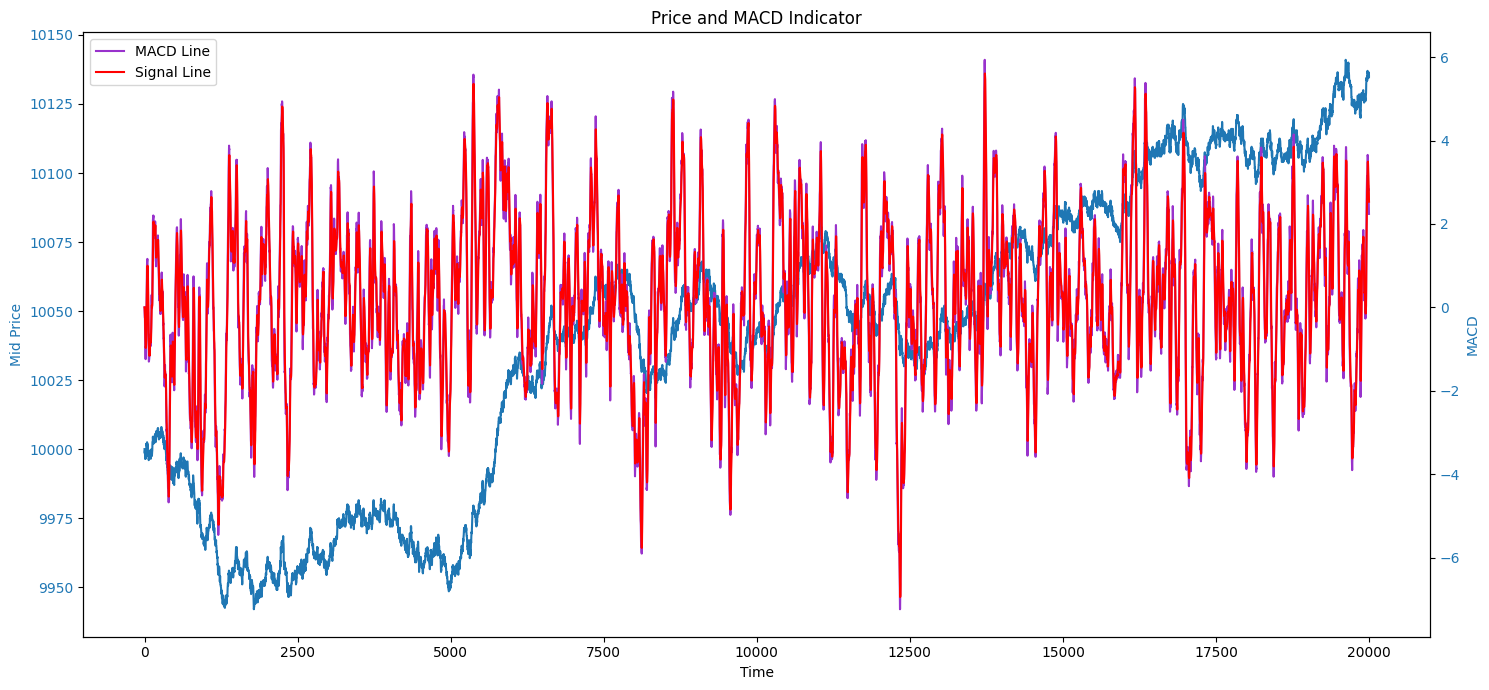

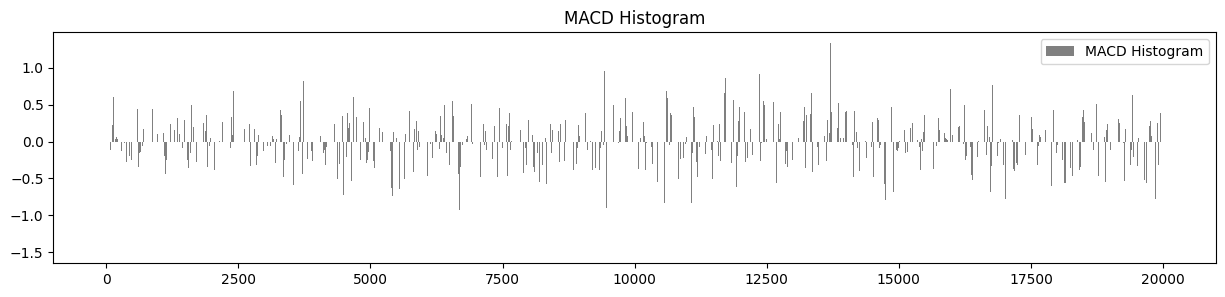

In [147]:
fig, ax1 = plt.subplots(figsize=(15, 7))

color = "tab:blue"
ax1.set_xlabel("Time")
ax1.set_ylabel("Mid Price", color=color)
ax1.plot(coconut_df.index, coconut_df["mid_price"], color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("MACD", color=color)  # we already handled the x-label with ax1
ax2.plot(
    coconut_df.index, coconut_df["MACD_line"], label="MACD Line", color="darkorchid"
)
ax2.plot(coconut_df.index, coconut_df["Signal_line"], label="Signal Line", color="red")
ax2.tick_params(axis="y", labelcolor=color)
ax2.legend(loc="upper left")

plt.title("Price and MACD Indicator")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Plot the MACD histogram separately to inspect its values
plt.figure(figsize=(15, 3))
plt.bar(
    coconut_df.index, coconut_df["MACD_histogram"], label="MACD Histogram", color="grey"
)
plt.legend()
plt.title("MACD Histogram")
plt.show()

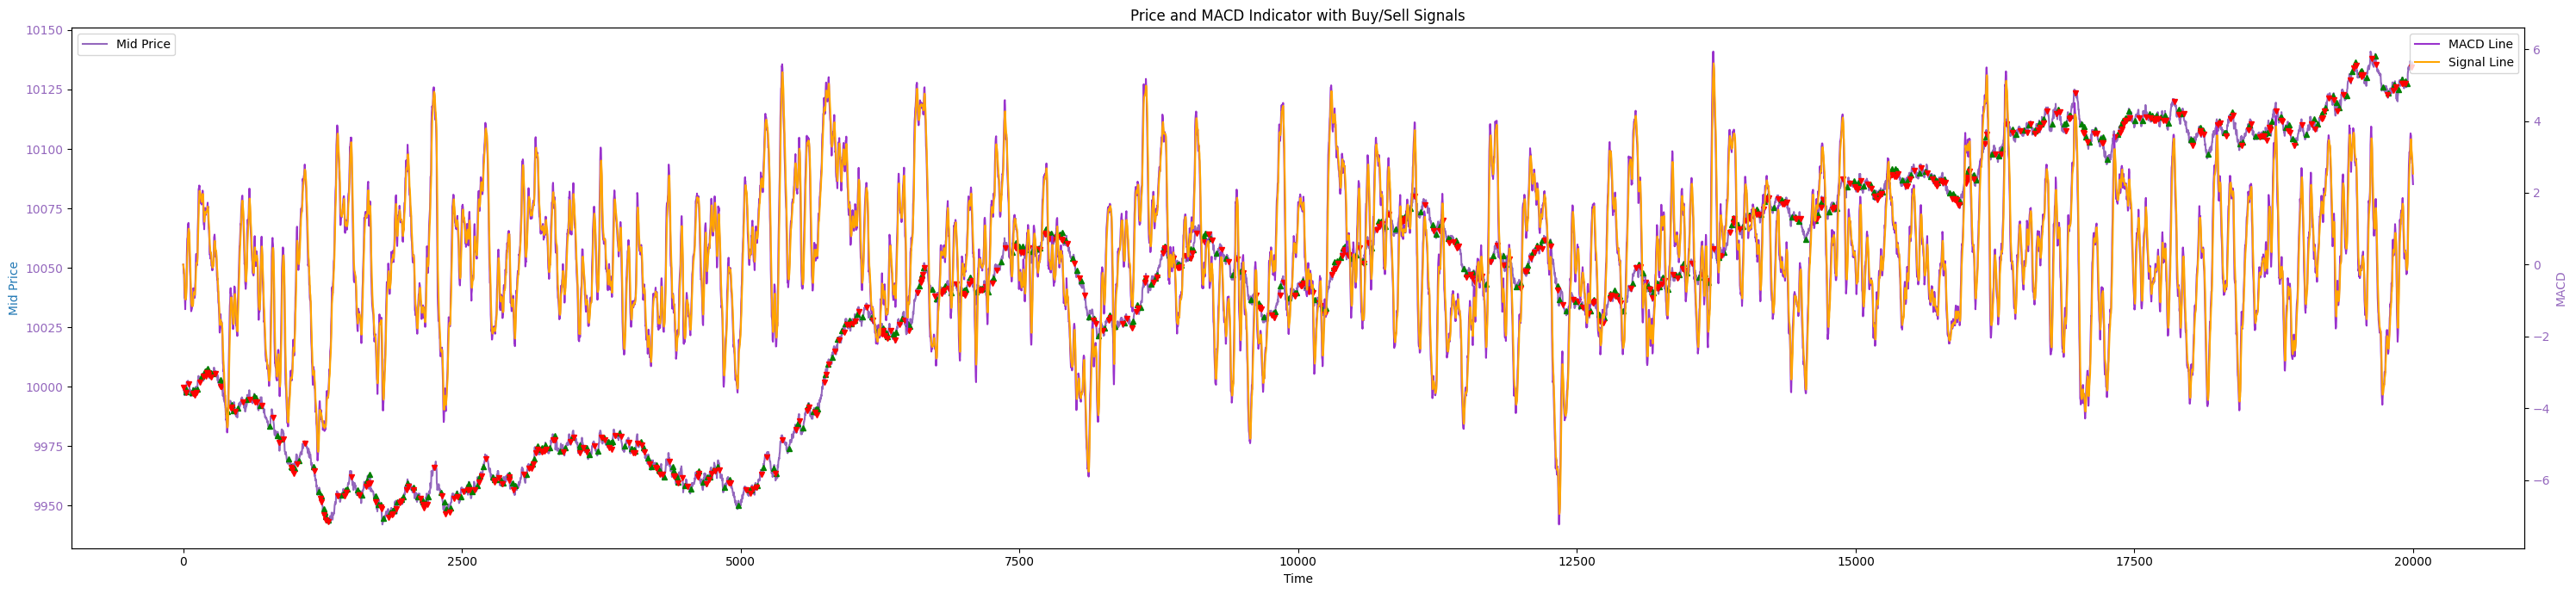

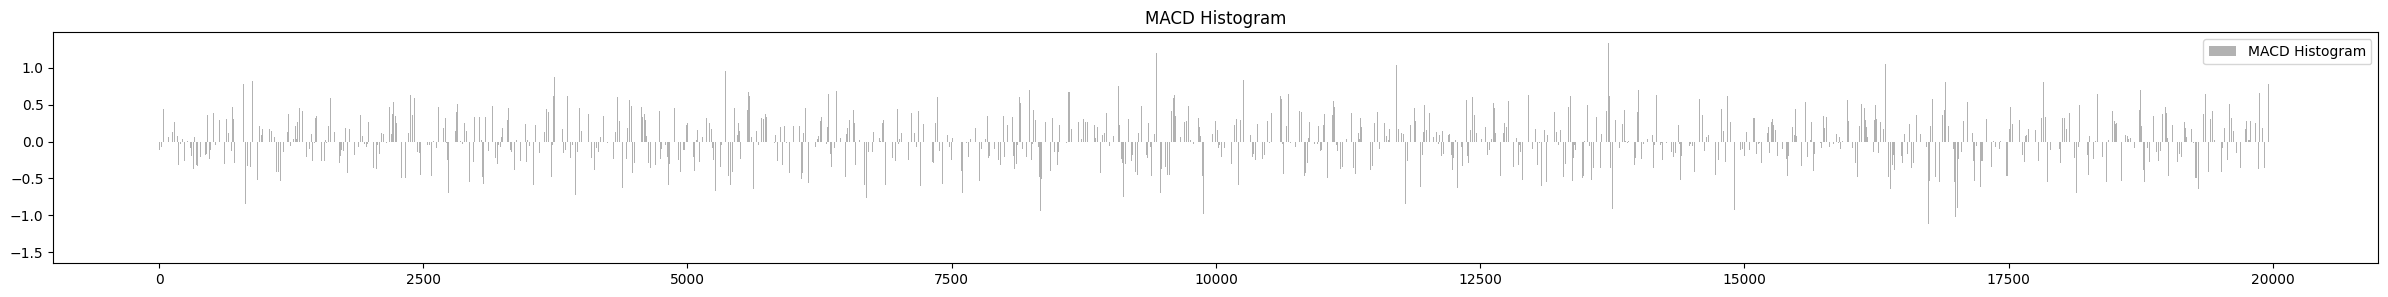

In [153]:
fig, ax1 = plt.subplots(figsize=(30, 7))

ax1.set_xlabel("Time")
ax1.set_ylabel("Mid Price", color="tab:blue")
ax1.plot(coconut_df.index, coconut_df["mid_price"], color=color, label="Mid Price")
ax1.tick_params(axis="y", labelcolor=color)
ax1.legend(loc="upper left")

# Highlight the buy and sell signals on the mid price plot
ax1.plot(
    coconut_df[coconut_df["MACD_Buy_Signal"]].index,
    coconut_df["mid_price"][coconut_df["MACD_Buy_Signal"]],
    "^",
    markersize=5,
    color="green",
    label="Buy Signal",
)
ax1.plot(
    coconut_df[coconut_df["MACD_Sell_Signal"]].index,
    coconut_df["mid_price"][coconut_df["MACD_Sell_Signal"]],
    "v",
    markersize=5,
    color="red",
    label="Sell Signal",
)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("MACD", color="tab:purple")
ax2.plot(
    coconut_df.index, coconut_df["MACD_line"], label="MACD Line", color="darkorchid"
)
ax2.plot(
    coconut_df.index, coconut_df["Signal_line"], label="Signal Line", color="orange"
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.legend(loc="upper right")

plt.title("Price and MACD Indicator with Buy/Sell Signals")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Plot the MACD histogram separately to inspect its values
plt.figure(figsize=(30, 3))
plt.bar(
    coconut_df.index,
    coconut_df["MACD_histogram"],
    label="MACD Histogram",
    color="black",
    alpha=0.3,
)
plt.legend()
plt.title("MACD Histogram")
plt.show()

# TSI

True Strength Index (TSI) is a momentum oscillator that helps to identify overbought and oversold conditions

1. Price Change (PC): The difference between the current price and the previous price.
2. Smoothed PC (SPC): An EMA of the Price Change.
3. Double Smoothed PC (DSPC): An EMA of the Smoothed PC.
4. Absolute Price Change (APC): The absolute difference between the current price and the previous price.
5. Smoothed APC (SAPC): An EMA of the Absolute Price Change.
6. Double Smoothed APC (DSAPC): An EMA of the Smoothed APC.

The Modified True Strength Index (MTSI) is a variation that might apply different periods to the EMAs or introduce additional smoothing or other modifications. Without a standard definition, I'll show you how to calculate a basic TSI and then make a slight modification to it:


In [156]:
# Example of calculating the True Strength Index (TSI)
def calculate_tsi(data, r=25, s=13):
    # Calculate Price Change (PC)
    data["PC"] = data["mid_price"].diff()

    # Calculate Smoothed PC (SPC)
    data["SPC"] = data["PC"].ewm(span=r, adjust=False).mean()

    # Calculate Double Smoothed PC (DSPC)
    data["DSPC"] = data["SPC"].ewm(span=s, adjust=False).mean()

    # Calculate Absolute PC (APC)
    data["APC"] = abs(data["PC"])

    # Calculate Smoothed APC (SAPC)
    data["SAPC"] = data["APC"].ewm(span=r, adjust=False).mean()

    # Calculate Double Smoothed APC (DSAPC)
    data["DSAPC"] = data["SAPC"].ewm(span=s, adjust=False).mean()

    # Calculate the True Strength Index (TSI)
    data["TSI"] = 100 * data["DSPC"] / data["DSAPC"]

    return data


# Apply the TSI calculation to your data
coconut_df = calculate_tsi(coconut_df)

# Now let's modify the TSI - for example, we could apply an additional smoothing to the TSI itself
coconut_df["MTSI"] = coconut_df["TSI"].ewm(span=7, adjust=False).mean()

Buy Signal: Generated when the MTSI crosses above the signal line or a specific threshold from below, indicating a shift towards positive momentum.  
Sell Signal: Generated when the MTSI crosses below the signal line or a specific threshold from above, indicating a shift towards negative momentum.


In [157]:
# window 10 for testing
coconut_df["MTSI_Signal"] = coconut_df["MTSI"].rolling(window=10).mean()

# Buy and sell signals
coconut_df["MTSI_Buy"] = (coconut_df["MTSI"] > coconut_df["MTSI_Signal"]) & (
    coconut_df["MTSI"].shift(1) <= coconut_df["MTSI_Signal"].shift(1)
)

coconut_df["MTSI_Sell"] = (coconut_df["MTSI"] < coconut_df["MTSI_Signal"]) & (
    coconut_df["MTSI"].shift(1) >= coconut_df["MTSI_Signal"].shift(1)
)

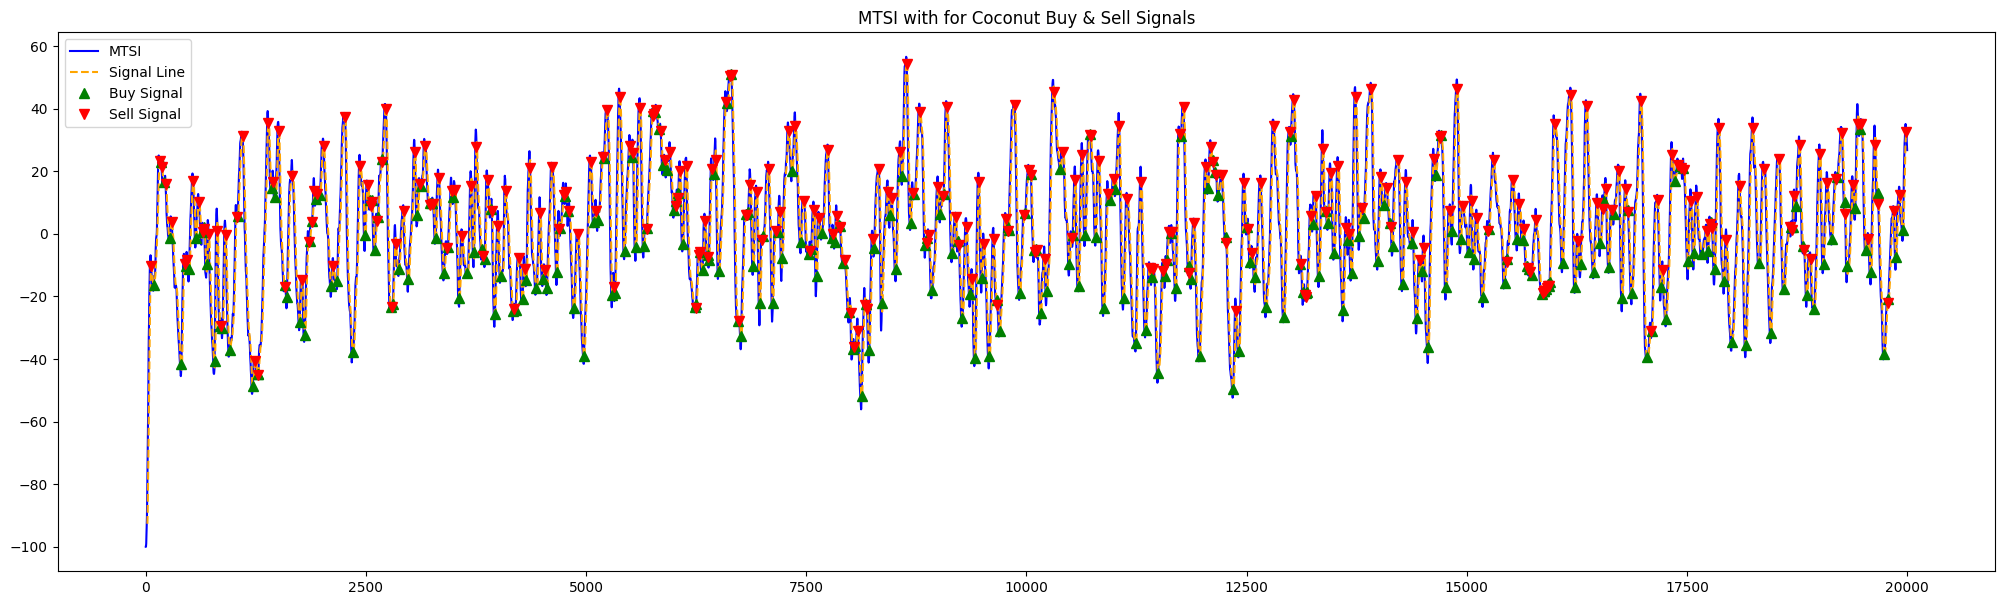

In [163]:
plt.figure(figsize=(25, 7))
plt.plot(coconut_df["MTSI"], label="MTSI", color="blue")
plt.plot(coconut_df["MTSI_Signal"], label="Signal Line", color="orange", linestyle="--")

# Highlight buy and sell signals
plt.plot(
    coconut_df.index[coconut_df["MTSI_Buy"]],
    coconut_df["MTSI"][coconut_df["MTSI_Buy"]],
    "^",
    markersize=7,
    color="green",
    label="Buy Signal",
)
plt.plot(
    coconut_df.index[coconut_df["MTSI_Sell"]],
    coconut_df["MTSI"][coconut_df["MTSI_Sell"]],
    "v",
    markersize=7,
    color="red",
    label="Sell Signal",
)

plt.title("MTSI with for Coconut Buy & Sell Signals")
plt.legend()
plt.show()

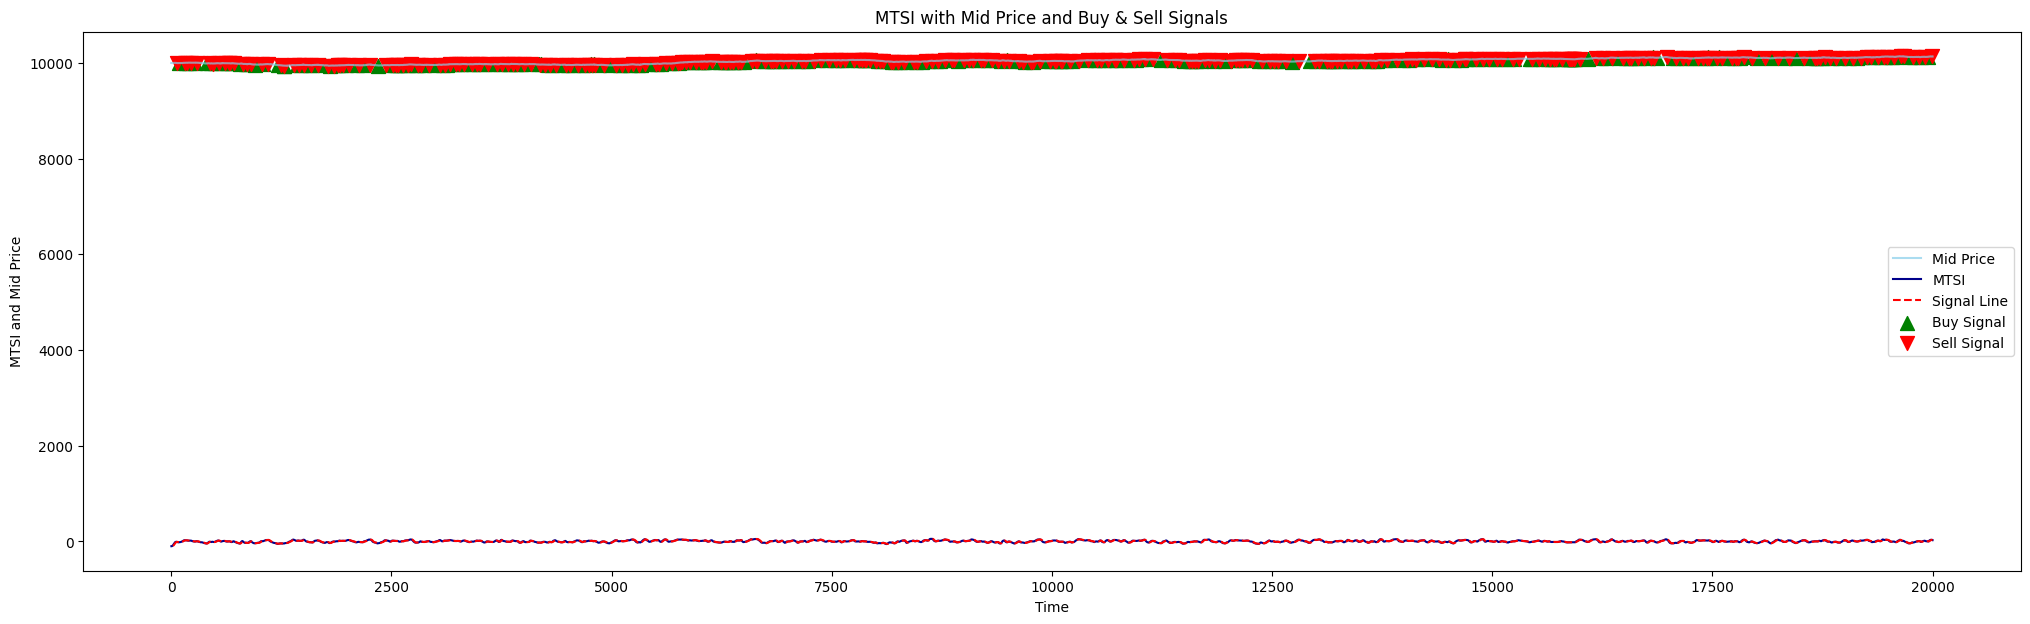

In [164]:
plt.figure(figsize=(25, 7))

# Plotting the mid price on the left y-axis
plt.plot(
    coconut_df.index,
    coconut_df["mid_price"],
    label="Mid Price",
    color="skyblue",
    alpha=0.7,
)

# Plotting the MTSI and Signal line on the right y-axis
plt.plot(coconut_df.index, coconut_df["MTSI"], label="MTSI", color="darkblue")
plt.plot(
    coconut_df.index,
    coconut_df["MTSI_Signal"],
    label="Signal Line",
    color="red",
    linestyle="--",
)

# Highlighting the buy and sell signals with up and down arrows
plt.scatter(
    coconut_df.index[coconut_df["MTSI_Buy"]],
    coconut_df["mid_price"][coconut_df["MTSI_Buy"]],
    label="Buy Signal",
    color="green",
    marker="^",
    s=100,
)
plt.scatter(
    coconut_df.index[coconut_df["MTSI_Sell"]],
    coconut_df["mid_price"][coconut_df["MTSI_Sell"]],
    label="Sell Signal",
    color="red",
    marker="v",
    s=100,
)

# Adding the legend to the plot
plt.legend()

# Adding the title and labels to the plot
plt.title("MTSI with Mid Price and Buy & Sell Signals")
plt.xlabel("Time")
plt.ylabel("MTSI and Mid Price")

# Display the plot
plt.show()

Re-scale


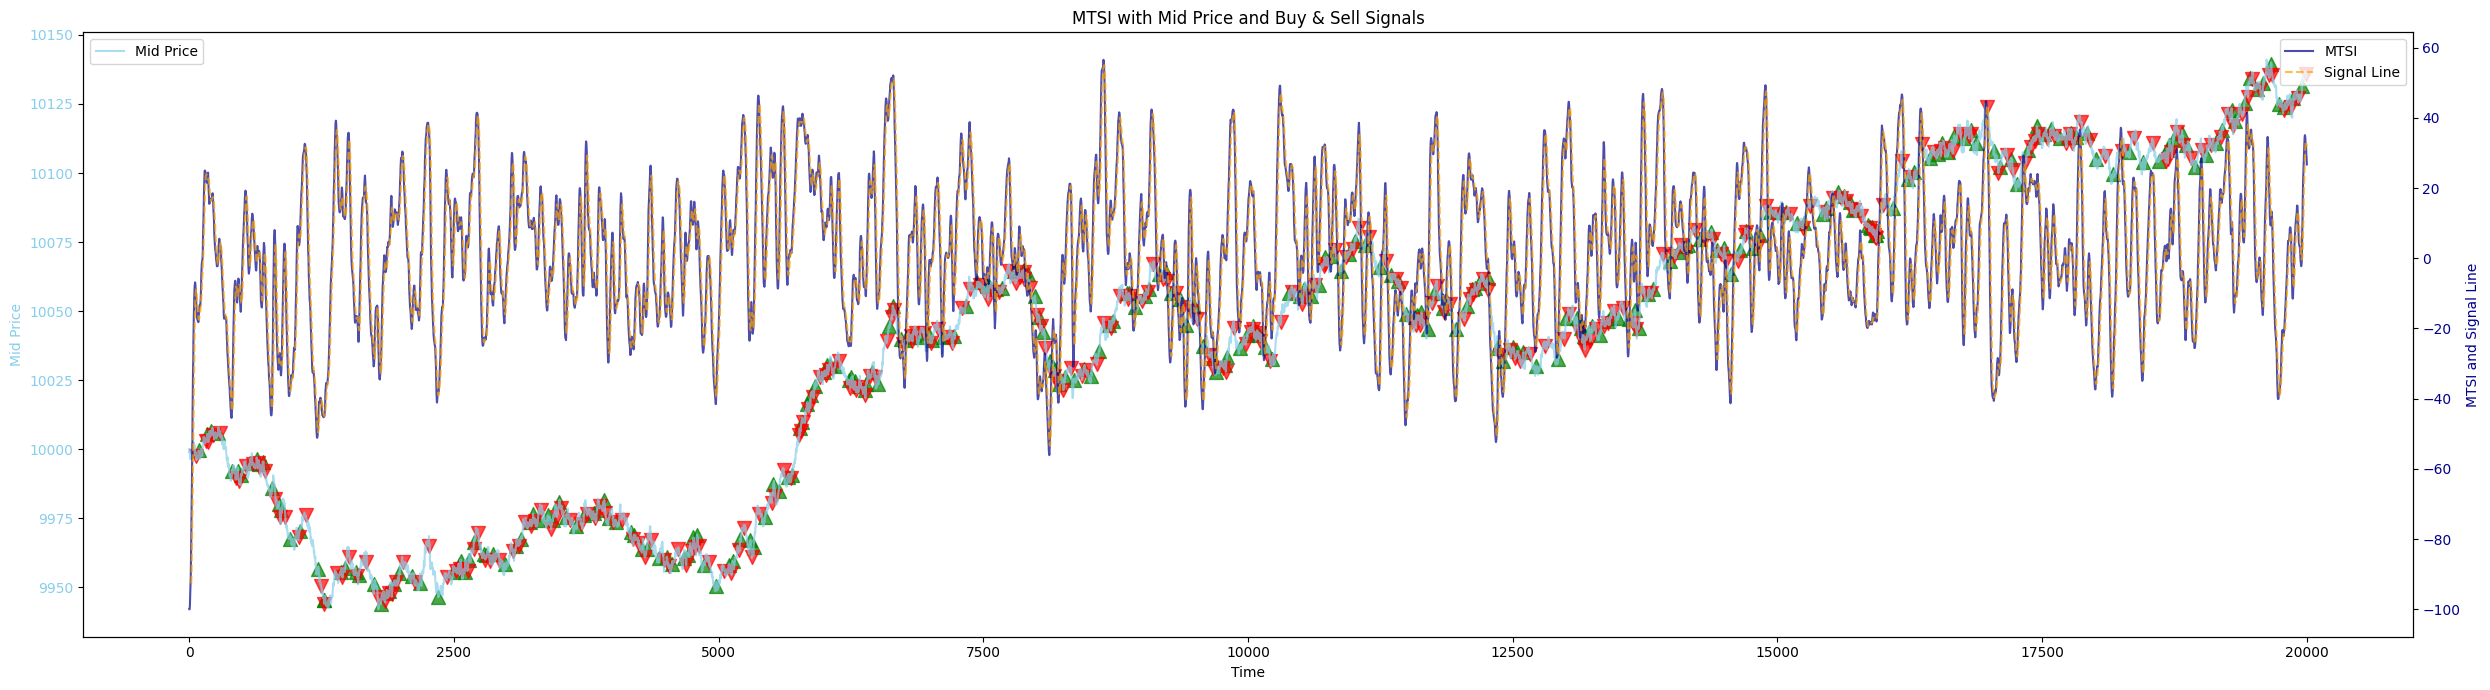

In [167]:
fig, ax1 = plt.subplots(figsize=(25, 7))

# Plot mid-price on primary y-axis
ax1.plot(
    coconut_df.index,
    coconut_df["mid_price"],
    label="Mid Price",
    color="skyblue",
    alpha=0.7,
)
ax1.set_xlabel("Time")
ax1.set_ylabel("Mid Price", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.legend(loc="upper left")

# Create secondary y-axis for MTSI and Signal Line
ax2 = ax1.twinx()
ax2.set_ylabel("MTSI and Signal Line", color="darkblue")
ax2.plot(
    coconut_df.index, coconut_df["MTSI"], label="MTSI", color="darkblue", alpha=0.7
)
ax2.plot(
    coconut_df.index,
    coconut_df["MTSI_Signal"],
    label="Signal Line",
    color="orange",
    linestyle="--",
    alpha=0.7,
)
ax2.tick_params(axis="y", labelcolor="darkblue")
ax2.legend(loc="upper right")

# Plot buy and sell signals
ax1.scatter(
    coconut_df.index[coconut_df["MTSI_Buy"]],
    coconut_df["mid_price"][coconut_df["MTSI_Buy"]],
    label="Buy Signal",
    color="green",
    marker="^",
    s=100,
    alpha=0.7,
)
ax1.scatter(
    coconut_df.index[coconut_df["MTSI_Sell"]],
    coconut_df["mid_price"][coconut_df["MTSI_Sell"]],
    label="Sell Signal",
    color="red",
    marker="v",
    s=100,
    alpha=0.7,
)

plt.title("MTSI with Mid Price and Buy & Sell Signals")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Optimised MTSI


In [168]:
def optimize_mtsi(
    df,
    price_column="mid_price",
    r_values=range(20, 30, 5),
    s_values=range(10, 20, 5),
    signal_ma_values=range(5, 15, 5),
):
    """
    Optimizes MTSI parameters and calculates PnL.

    :param df: DataFrame with price data
    :param price_column: The name of the column with price data
    :param r_values: Range of values to test for the first EMA period
    :param s_values: Range of values to test for the second EMA period
    :param signal_ma_values: Range of values for the signal line's MA period
    :return: DataFrame with the best PnL and its corresponding MTSI
    """
    best_pnl = -np.inf
    best_params = None
    best_signals = None

    for r in r_values:
        for s in s_values:
            for signal_ma in signal_ma_values:
                # Calculate MTSI
                df["PC"] = df[price_column].diff()
                df["SPC"] = df["PC"].ewm(span=r, adjust=False).mean()
                df["DSPC"] = df["SPC"].ewm(span=s, adjust=False).mean()
                df["MTSI"] = (
                    100 * df["DSPC"] / df["SPC"].ewm(span=s, adjust=False).mean()
                )

                # Calculate Signal Line
                df["MTSI_Signal"] = df["MTSI"].rolling(window=signal_ma).mean()

                # Generate Buy/Sell signals
                df["Buy_Signal"] = (df["MTSI"] > df["MTSI_Signal"]) & (
                    df["MTSI"].shift(1) <= df["MTSI_Signal"].shift(1)
                )
                df["Sell_Signal"] = (df["MTSI"] < df["MTSI_Signal"]) & (
                    df["MTSI"].shift(1) >= df["MTSI_Signal"].shift(1)
                )

                # Calculate PnL
                buy_prices = df.loc[df["Buy_Signal"], price_column]
                sell_prices = df.loc[df["Sell_Signal"], price_column]

                # Match buys with sells, ignore unmatched trades
                if len(buy_prices) > len(sell_prices):
                    buy_prices = buy_prices.iloc[: len(sell_prices)]
                elif len(sell_prices) > len(buy_prices):
                    sell_prices = sell_prices.iloc[: len(buy_prices)]

                pnl = (sell_prices.values - buy_prices.values).sum()

                # If PnL is better, update the best params and signals
                if pnl > best_pnl:
                    best_pnl = pnl
                    best_params = (r, s, signal_ma)
                    best_signals = df[["Buy_Signal", "Sell_Signal"]].copy()

    return best_pnl, best_params, best_signals


# Sample usage:
# Assume coconut_df is your DataFrame and 'mid_price' is the column with price data.
pnl, params, signals = optimize_mtsi(coconut_df, price_column="mid_price")
print(f"Best PnL: {pnl}, Best Params: {params}")

Best PnL: 109.5, Best Params: (25, 10, 10)


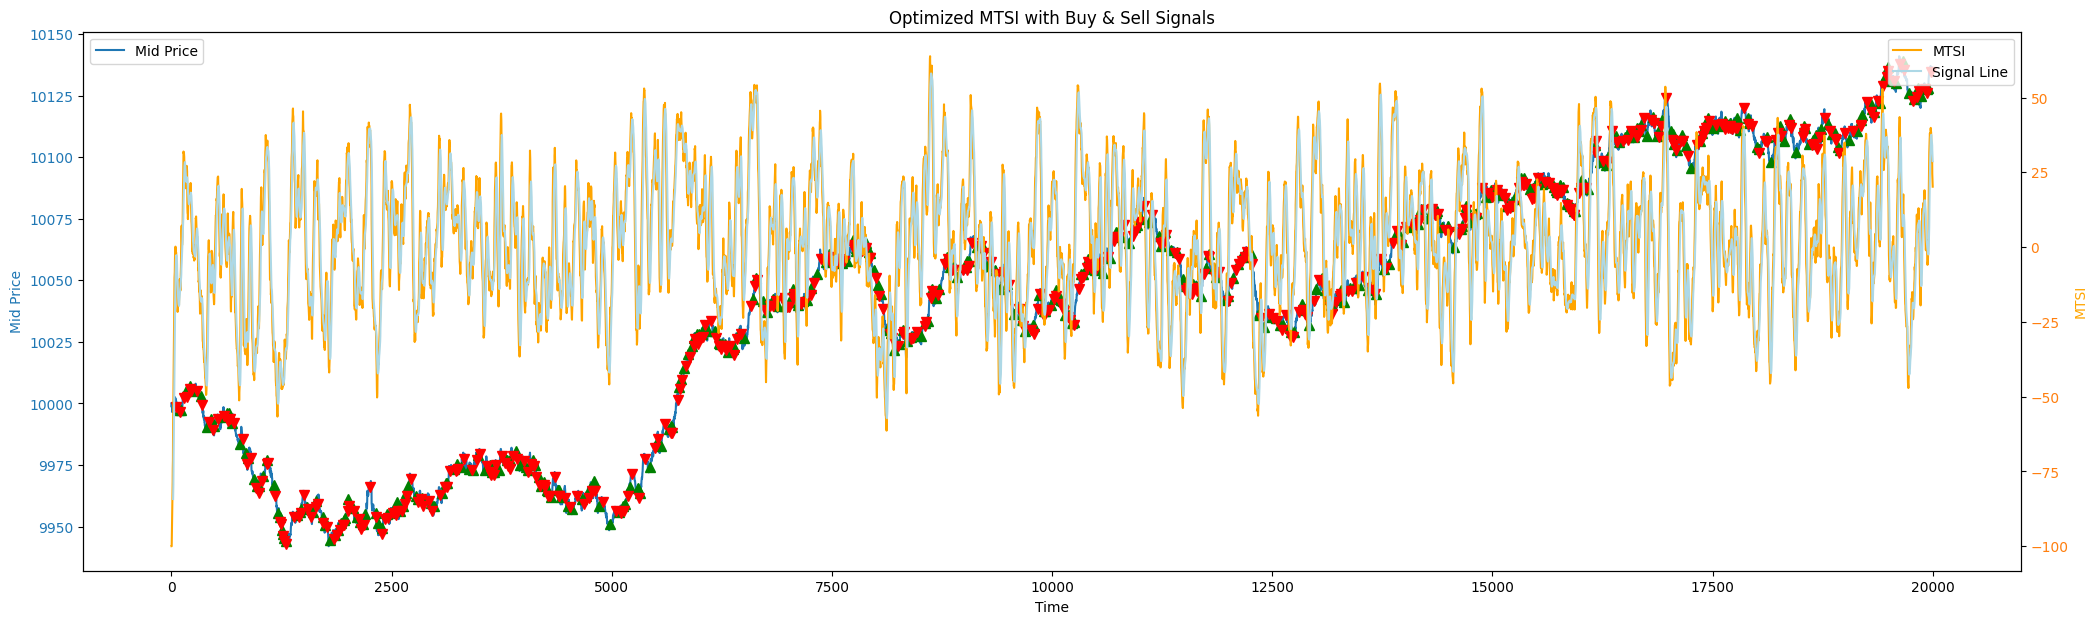

In [173]:
# Recalculate MTSI with the optimized parameters
coconut_df["MTSI"] = (
    100
    * coconut_df["mid_price"]
    .diff()
    .ewm(span=params[0], adjust=False)
    .mean()
    .ewm(span=params[1], adjust=False)
    .mean()
    / coconut_df["mid_price"]
    .diff()
    .abs()
    .ewm(span=params[0], adjust=False)
    .mean()
    .ewm(span=params[1], adjust=False)
    .mean()
)

coconut_df["MTSI_Signal"] = coconut_df["MTSI"].rolling(window=params[2]).mean()

# Generate Buy and Sell signals based on the optimized parameters
coconut_df["Buy_Signal"] = (coconut_df["MTSI"] > coconut_df["MTSI_Signal"]) & (
    coconut_df["MTSI"].shift(1) <= coconut_df["MTSI_Signal"].shift(1)
)
coconut_df["Sell_Signal"] = (coconut_df["MTSI"] < coconut_df["MTSI_Signal"]) & (
    coconut_df["MTSI"].shift(1) >= coconut_df["MTSI_Signal"].shift(1)
)

# Plot the mid_price and MTSI
fig, ax1 = plt.subplots(figsize=(25, 7))

ax1.set_xlabel("Time")
ax1.set_ylabel("Mid Price", color="tab:blue")
ax1.plot(coconut_df.index, coconut_df["mid_price"], label="Mid Price", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.legend(loc="upper left")

# Create a secondary y-axis for the MTSI values
ax2 = ax1.twinx()
ax2.set_ylabel("MTSI", color="orange")
ax2.plot(coconut_df.index, coconut_df["MTSI"], label="MTSI", color="orange")
ax2.plot(
    coconut_df.index,
    coconut_df["MTSI_Signal"],
    label="Signal Line",
    color="lightblue",
)
ax2.tick_params(axis="y", labelcolor="tab:orange")
ax2.legend(loc="upper right")

# Annotate Buy and Sell signals
ax1.plot(
    coconut_df[coconut_df["Buy_Signal"]].index,
    coconut_df["mid_price"][coconut_df["Buy_Signal"]],
    "^",
    markersize=7,
    color="green",
    label="Buy Signal",
)
ax1.plot(
    coconut_df[coconut_df["Sell_Signal"]].index,
    coconut_df["mid_price"][coconut_df["Sell_Signal"]],
    "v",
    markersize=7,
    color="red",
    label="Sell Signal",
)

plt.title("Optimized MTSI with Buy & Sell Signals")
plt.show()